In [ ]:
# Installing Required Libraries
# This installs tools we need for generating fake data

!pip install faker -q

print("Libraries installed successfully!")
print("You're ready to generate transaction data!")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.3 MB/s eta 0:00:00
Libraries installed successfully!
You're ready to generate transaction data!


In [ ]:
# Importing All Required Libraries
# These are tools we'll use throughout the project

import pandas as pd          # Work with data tables
import numpy as np           # Math operations
from faker import Faker      # Generate realistic fake data
from datetime import datetime, timedelta  # Handle dates/times
import random                # Random number generation
import matplotlib.pyplot as plt  # Create charts
import seaborn as sns        # Beautiful charts

# Set random seed (makes results reproducible)
np.random.seed(42)
random.seed(42)

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("="*60)
print("LIBRARY VERSIONS")
print("="*60)
print(f"✓ Pandas:     {pd.__version__}")
print(f"✓ NumPy:      {np.__version__}")
print(f"✓ Matplotlib: {plt.matplotlib.__version__}")
print("="*60)
print("All libraries imported successfully!")
print(" Ready to generate UPI transactions!")


LIBRARY VERSIONS
✓ Pandas:     2.2.2
✓ NumPy:      2.0.2
✓ Matplotlib: 3.10.0
All libraries imported successfully!
 Ready to generate UPI transactions!


In [ ]:
# Generating Realistic UPI Transaction Data
# This is the heart of our data generation!

def generate_upi_transactions(num_transactions=10000):
    """
    Generate realistic UPI transaction data for fraud detection

    WHAT THIS DOES:
    - Creates 10,000 transactions
    - 98% legitimate, 2% fraudulent
    - Fraud has realistic patterns (high amounts, night time, etc.)

    PARAMETERS:
    - num_transactions: How many to generate (default: 10,000)

    RETURNS:
    - DataFrame with transaction data
    """

    print("="*70)
    print("GENERATING UPI TRANSACTION DATA")
    print("="*70)
    print(f"Target: {num_transactions:,} transactions")
    print(f" Estimated time: ~15 seconds")
    print("="*70)
    print()

    # Initialize Faker with Indian locale
    fake = Faker('en_IN')

    # Lists to store all transactions
    transactions = []

    # ==========================================
    # SETUP: Create pools of realistic data
    # ==========================================

    # 1000 unique customers (realistic: same customers make multiple transactions)
    customers = [f"CUST{str(i).zfill(5)}" for i in range(1, 1001)]
    print("✓ Created 1,000 unique customers")

    # Indian cities
    cities = [
        'Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Chennai',
        'Kolkata', 'Pune', 'Ahmedabad', 'Jaipur', 'Indore',
        'Lucknow', 'Surat', 'Kochi', 'Nagpur', 'Chandigarh',
        'Bhopal', 'Visakhapatnam', 'Patna', 'Vadodara', 'Ludhiana'
    ]
    print(" Loaded 20 Indian cities")

    # Merchant categories (where people spend money)
    categories = [
        'Grocery', 'Electronics', 'Fashion & Apparel', 'Food & Dining',
        'Travel & Hotels', 'Pharmacy & Health', 'Entertainment',
        'Utilities & Bills', 'Education', 'Health & Fitness',
        'Home & Garden', 'Automotive', 'Beauty & Personal Care'
    ]
    print(" Loaded 13 merchant categories")

    # UPI transaction types
    txn_types = ['P2P', 'P2M', 'Bill_Payment']
    print(" Transaction types ready")

    # Start date: 90 days ago from today
    start_date = datetime.now() - timedelta(days=90)
    print(f" Date range: {start_date.date()} to {datetime.now().date()}")
    print()

    # ==========================================
    # GENERATION: Create transactions
    # ==========================================

    print(" Generating transactions...")

    for i in range(num_transactions):

        # Random timestamp in last 90 days
        random_seconds = random.randint(0, 90*24*60*60)
        timestamp = start_date + timedelta(seconds=random_seconds)

        # Random customer
        customer_id = random.choice(customers)

        # Random device
        device_id = f"DEV{random.randint(1000, 9999)}"

        # ==========================================
        # 98% LEGITIMATE TRANSACTIONS
        # ==========================================
        if random.random() > 0.02:

            # Realistic amount distribution
            # Most people spend ₹100-5000, few spend more
            # Using log-normal distribution (realistic spending pattern)
            amount = np.random.lognormal(mean=6, sigma=1.5)
            amount = min(amount, 50000)  # Cap at ₹50K
            amount = max(amount, 10)      # Minimum ₹10

            # Random merchant
            merchant_category = random.choice(categories)

            # Random location
            location = random.choice(cities)

            # Random transaction type
            transaction_type = random.choice(txn_types)

            # Mark as legitimate
            is_fraud = 0

        # ==========================================
        # 2% FRAUDULENT TRANSACTIONS
        # ==========================================
        else:

            # FRAUD PATTERN 1: High amounts
            amount = random.uniform(20000, 100000)

            # FRAUD PATTERN 2: High-value categories
            merchant_category = random.choice([
                'Electronics', 'Travel & Hotels', 'Fashion & Apparel'
            ])

            # FRAUD PATTERN 3: Unusual times (2 AM - 5 AM)
            timestamp = timestamp.replace(
                hour=random.randint(2, 5),
                minute=random.randint(0, 59),
                second=random.randint(0, 59)
            )

            # Random location
            location = random.choice(cities)

            # Usually P2M (merchant payment)
            transaction_type = 'P2M'

            # Mark as fraud
            is_fraud = 1

        # ==========================================
        # BUILD TRANSACTION RECORD
        # ==========================================
        transaction = {
            'transaction_id': f'UPI{timestamp.strftime("%Y%m%d")}{str(i).zfill(6)}',
            'timestamp': timestamp,
            'customer_id': customer_id,
            'device_id': device_id,
            'amount': round(amount, 2),
            'merchant_category': merchant_category,
            'location': location,
            'transaction_type': transaction_type,
            'hour_of_day': timestamp.hour,
            'day_of_week': timestamp.weekday(),  # 0=Monday, 6=Sunday
            'is_fraud': is_fraud
        }

        transactions.append(transaction)

        # Progress indicator (every 2000 transactions)
        if (i + 1) % 2000 == 0:
            progress = (i + 1) / num_transactions * 100
            print(f" Progress: {progress:5.1f}% | {i+1:,}/{num_transactions:,} transactions")

    print()
    print("✓ Generation complete!")
    print()

    # ==========================================
    # CONVERT TO DATAFRAME
    # ==========================================
    print(" Converting to DataFrame...")
    df = pd.DataFrame(transactions)

    # Sort by timestamp (chronological order)
    df = df.sort_values('timestamp').reset_index(drop=True)
    print("✓ Data sorted by time")

    # ==========================================
    # SUMMARY STATISTICS
    # ==========================================
    legitimate_count = len(df[df['is_fraud'] == 0])
    fraud_count = len(df[df['is_fraud'] == 1])
    total_amount = df['amount'].sum()
    fraud_amount = df[df['is_fraud'] == 1]['amount'].sum()

    print()
    print("="*70)
    print(" DATA GENERATION COMPLETE!")
    print("="*70)
    print(f" Total Transactions:     {len(df):,}")
    print(f"    Legitimate:           {legitimate_count:,} ({legitimate_count/len(df)*100:.2f}%)")
    print(f"    Fraudulent:           {fraud_count:,} ({fraud_count/len(df)*100:.2f}%)")
    print(f" Total Amount:           ₹{total_amount:,.2f}")
    print(f"   Legitimate:             ₹{total_amount - fraud_amount:,.2f}")
    print(f"   Fraud (prevented):      ₹{fraud_amount:,.2f}")
    print(f" Date Range:             {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
    print(f" Locations:              {df['location'].nunique()} cities")
    print(f" Unique Customers:       {df['customer_id'].nunique():,}")
    print(f" Merchant Categories:    {df['merchant_category'].nunique()}")
    print("="*70)

    return df


# ==========================================
# EXECUTE: Generate the data!
# ==========================================
print(" Starting transaction generation...\n")
df_transactions = generate_upi_transactions(num_transactions=10000)
print("\n Success! Data is ready in variable: df_transactions")


 Starting transaction generation...

GENERATING UPI TRANSACTION DATA
Target: 10,000 transactions
 Estimated time: ~15 seconds

✓ Created 1,000 unique customers
 Loaded 20 Indian cities
 Loaded 13 merchant categories
 Transaction types ready
 Date range: 2025-09-17 to 2025-12-16

 Generating transactions...
 Progress:  20.0% | 2,000/10,000 transactions
 Progress:  40.0% | 4,000/10,000 transactions
 Progress:  60.0% | 6,000/10,000 transactions
 Progress:  80.0% | 8,000/10,000 transactions
 Progress: 100.0% | 10,000/10,000 transactions

✓ Generation complete!

 Converting to DataFrame...
✓ Data sorted by time

 DATA GENERATION COMPLETE!
 Total Transactions:     10,000
    Legitimate:           9,785 (97.85%)
    Fraudulent:           215 (2.15%)
 Total Amount:           ₹25,206,711.67
   Legitimate:             ₹12,092,496.77
   Fraud (prevented):      ₹13,114,214.90
 Date Range:             2025-09-17 to 2025-12-16
 Locations:              20 cities
 Unique Customers:       1,000
 Mercha

In [ ]:
# Viewing the Generated Data
# Let's see what our transactions look like!

print("="*80)
print("FIRST 10 TRANSACTIONS (Sample Data)")
print("="*80)
print()

# Display first 10 rows
display(df_transactions.head(10))

print("\n" + "="*80)
print("LAST 10 TRANSACTIONS")
print("="*80)
print()

# Display last 10 rows
display(df_transactions.tail(10))

print("\n" + "="*80)
print("DATASET STRUCTURE")
print("="*80)
print()

# Show column info
print("Columns in dataset:")
for i, col in enumerate(df_transactions.columns, 1):
    print(f"  {i:2d}. {col:20s} - {df_transactions[col].dtype}")

print("\n" + "="*80)
print("QUICK STATISTICS")
print("="*80)
print()

# Numerical statistics
print(df_transactions.describe())

print("\n" + "="*80)
print("FRAUD DISTRIBUTION")
print("="*80)
print()

fraud_dist = df_transactions['is_fraud'].value_counts()
print("Transaction counts:")
print(f"  Legitimate (0): {fraud_dist[0]:,} ({fraud_dist[0]/len(df_transactions)*100:.2f}%)")
print(f"  Fraudulent (1): {fraud_dist[1]:,} ({fraud_dist[1]/len(df_transactions)*100:.2f}%)")

print("\n" + "="*80)
print("AMOUNT ANALYSIS")
print("="*80)
print()

print("Amount statistics by fraud status:")
amount_by_fraud = df_transactions.groupby('is_fraud')['amount'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Total', 'sum')
])
print(amount_by_fraud.to_string())

print("\n" + "="*80)
print(" TOP 5 MERCHANT CATEGORIES")
print("="*80)
print()

top_categories = df_transactions['merchant_category'].value_counts().head()
for category, count in top_categories.items():
    percentage = (count / len(df_transactions)) * 100
    print(f"  {category:25s}: {count:4d} ({percentage:5.2f}%)")

print("\n" + "="*80)
print("TOP 5 CITIES")
print("="*80)
print()

top_cities = df_transactions['location'].value_counts().head()
for city, count in top_cities.items():
    percentage = (count / len(df_transactions)) * 100
    print(f"  {city:25s}: {count:4d} ({percentage:5.2f}%)")

FIRST 10 TRANSACTIONS (Sample Data)



,transaction_id,timestamp,customer_id,device_id,amount,merchant_category,location,transaction_type,hour_of_day,day_of_week,is_fraud
0,UPI20250917002777,2025-09-17 04:26:47.232206,CUST00585,DEV6823,73166.42,Travel & Hotels,Mumbai,P2M,4,2,1
1,UPI20250917009020,2025-09-17 14:36:28.232206,CUST00880,DEV3666,1518.40,Health & Fitness,Kolkata,P2P,14,2,0
2,UPI20250917004127,2025-09-17 14:40:16.232206,CUST00799,DEV5438,289.38,Grocery,Chandigarh,Bill_Payment,14,2,0
3,UPI20250917007609,2025-09-17 14:40:23.232206,CUST00426,DEV2267,1292.51,Entertainment,Lucknow,P2M,14,2,0
4,UPI20250917009658,2025-09-17 14:45:34.232206,CUST00700,DEV7349,176.08,Entertainment,Indore,P2P,14,2,0
5,UPI20250917008625,2025-09-17 14:48:57.232206,CUST00138,DEV4676,511.04,Utilities & Bills,Hyderabad,P2M,14,2,0
6,UPI20250917009282,2025-09-17 14:55:54.232206,CUST00660,DEV3313,4485.10,Entertainment,Patna,Bill_Payment,14,2,0
7,UPI20250917001680,2025-09-17 15:43:15.232206,CUST00054,DEV6269,795.17,Utilities & Bills,Jaipur,Bill_Payment,15,2,0
8,UPI20250917002708,2025-09-17 15:47:36.232206,CUST00068,DEV3677,150.39,Travel & Hotels,Bhopal,P2P,15,2,0
9,UPI20250917003639,2025-09-17 15:56:40.232206,CUST00218,DEV1752,572.02,Automotive,Kochi,Bill_Payment,15,2,0



LAST 10 TRANSACTIONS



,transaction_id,timestamp,customer_id,device_id,amount,merchant_category,location,transaction_type,hour_of_day,day_of_week,is_fraud
9990,UPI20251216002760,2025-12-16 11:20:40.232206,CUST00399,DEV6383,1934.56,Home & Garden,Pune,P2P,11,1,0
9991,UPI20251216003542,2025-12-16 11:24:53.232206,CUST00271,DEV1819,217.51,Home & Garden,Patna,P2P,11,1,0
9992,UPI20251216002717,2025-12-16 12:19:44.232206,CUST00101,DEV9883,97.27,Entertainment,Kochi,P2M,12,1,0
9993,UPI20251216008004,2025-12-16 12:27:13.232206,CUST00071,DEV9057,1232.60,Home & Garden,Delhi,P2P,12,1,0
9994,UPI20251216005275,2025-12-16 12:30:27.232206,CUST00769,DEV2464,607.60,Home & Garden,Chandigarh,P2P,12,1,0
9995,UPI20251216002851,2025-12-16 12:42:18.232206,CUST00752,DEV1328,100.48,Travel & Hotels,Kochi,Bill_Payment,12,1,0
9996,UPI20251216003167,2025-12-16 12:44:16.232206,CUST00432,DEV5637,4789.69,Entertainment,Kochi,Bill_Payment,12,1,0
9997,UPI20251216003834,2025-12-16 13:36:05.232206,CUST00637,DEV8240,660.94,Entertainment,Patna,P2M,13,1,0
9998,UPI20251216006714,2025-12-16 13:37:22.232206,CUST00864,DEV6276,2788.60,Automotive,Ludhiana,P2M,13,1,0
9999,UPI20251216007119,2025-12-16 13:52:50.232206,CUST00100,DEV2302,903.45,Grocery,Indore,P2P,13,1,0



DATASET STRUCTURE

Columns in dataset:
   1. transaction_id       - object
   2. timestamp            - datetime64[ns]
   3. customer_id          - object
   4. device_id            - object
   5. amount               - float64
   6. merchant_category    - object
   7. location             - object
   8. transaction_type     - object
   9. hour_of_day          - int64
  10. day_of_week          - int64
  11. is_fraud             - int64

QUICK STATISTICS

                           timestamp        amount   hour_of_day  \
count                          10000  10000.000000  10000.000000   
mean   2025-11-01 13:36:20.535106048   2520.671167     11.383100   
min       2025-09-17 04:26:47.232206     10.000000      0.000000   
25%    2025-10-10 03:22:36.482206208    151.665000      5.000000   
50%    2025-11-01 17:50:23.232206080    417.310000     11.000000   
75%    2025-11-23 20:11:04.732206080   1186.682500     17.000000   
max       2025-12-16 13:52:50.232206  99481.860000     23.00000

 Creating comprehensive visualizations...
 This will take ~10 seconds...



/tmp/ipython-input-496786764.py:169: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(box_data, labels=['Legitimate', 'Fraudulent'],
/tmp/ipython-input-496786764.py:193: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


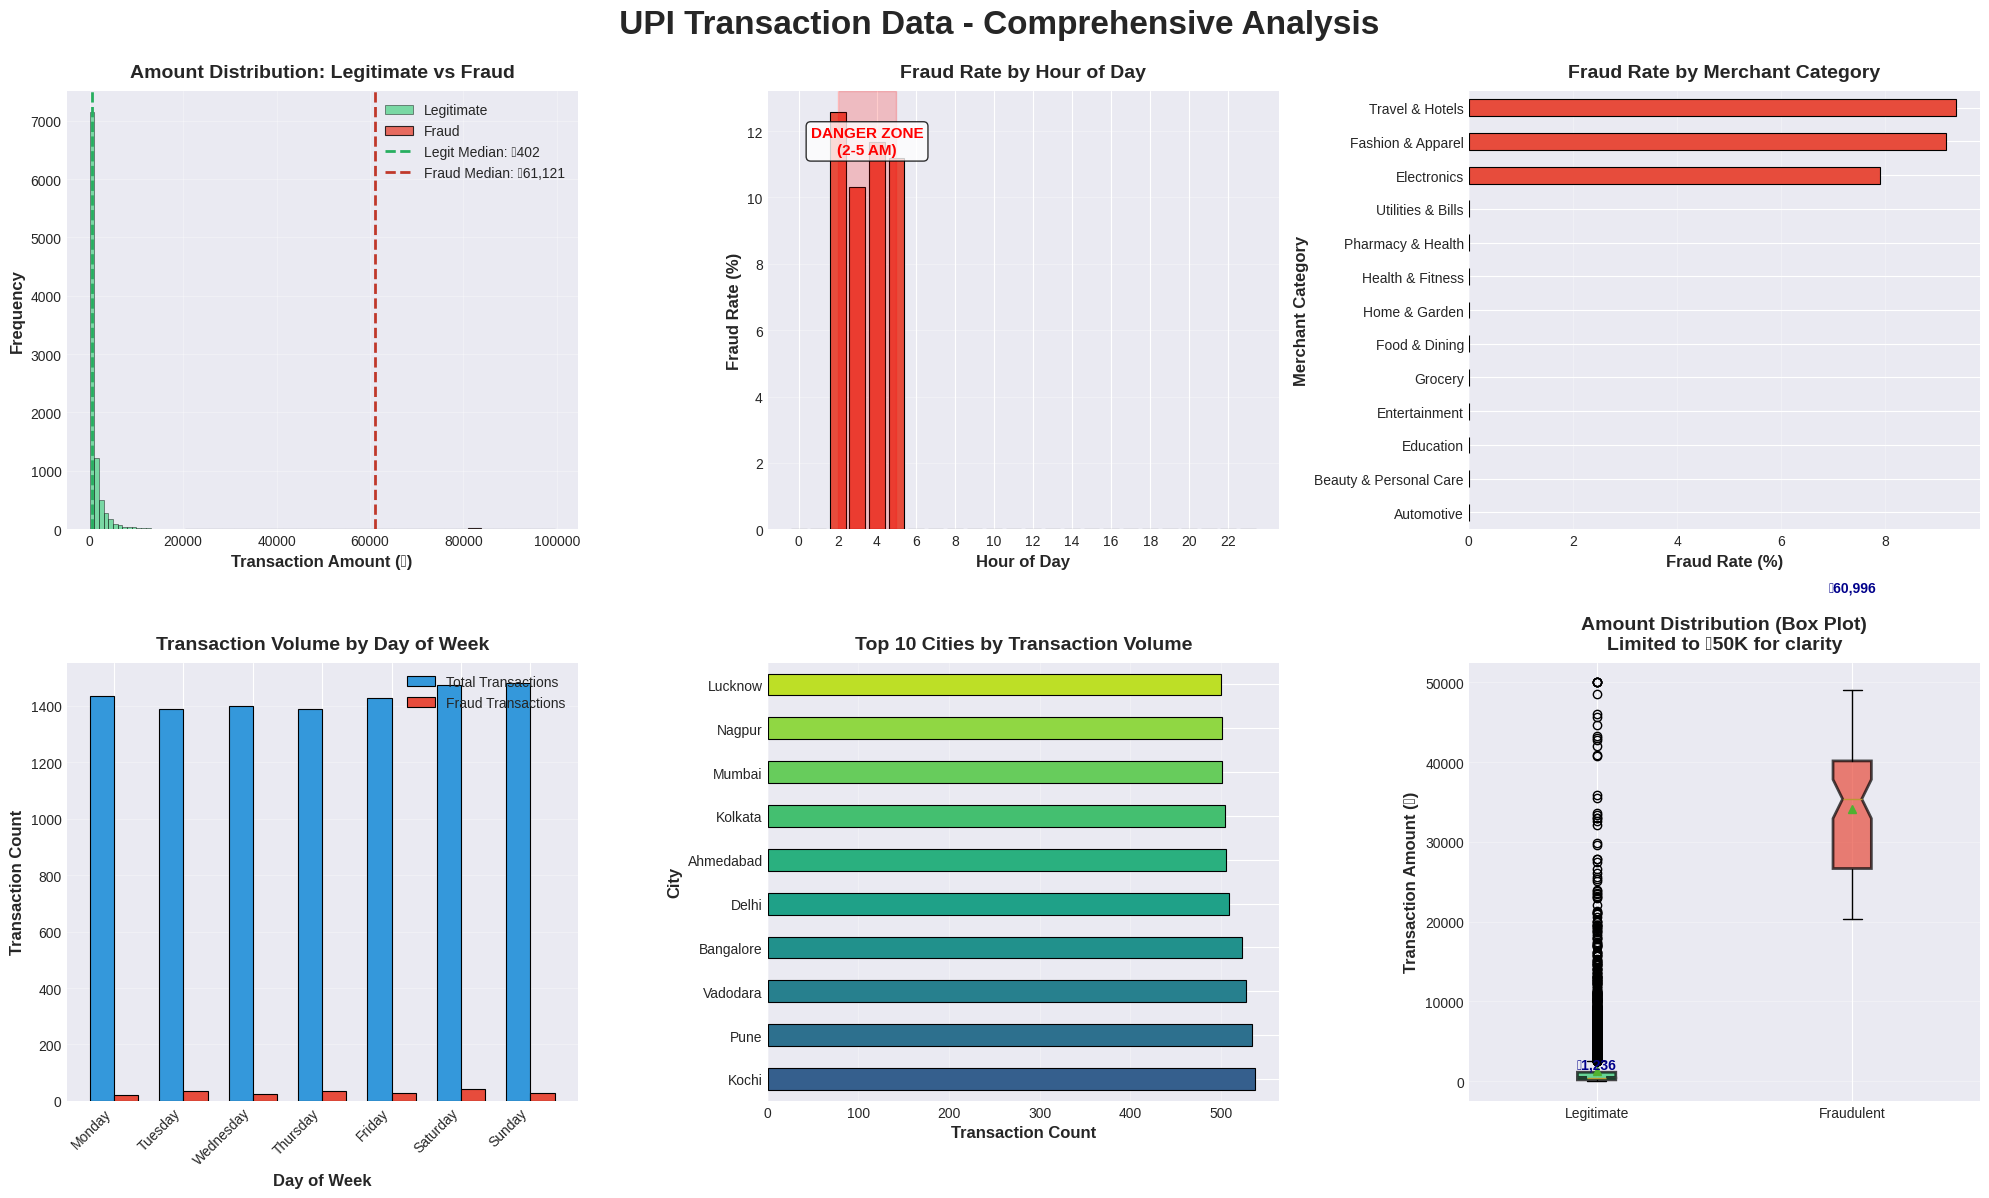


KEY INSIGHTS FROM DATA ANALYSIS

AMOUNT PATTERNS:
  • Legitimate median: ₹401.75
  • Fraud median: ₹61,121.43
  • Fraud amounts are 152.1x higher! 🚨

TIME PATTERNS:
  • Most dangerous hour: 2:00 (12.58% fraud rate) ⚠️
  • Safest hour: 0:00 (0.00% fraud rate) ✅

CATEGORY PATTERNS:
  • Riskiest category: Travel & Hotels (9.35% fraud) 🔴
  • Safest category: Automotive (0.00% fraud) 🟢

GEOGRAPHIC PATTERNS:
  • Top city: Kochi (537 transactions)
  • Total coverage: 20 cities

Data exploration complete!


In [ ]:
# Data Exploration with Visualizations
# Let's create beautiful charts to understand our data!

print(" Creating comprehensive visualizations...")
print(" This will take ~10 seconds...\n")

# Set professional style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with 6 subplots (2 rows x 3 columns)
fig = plt.figure(figsize=(20, 12))
fig.suptitle(' UPI Transaction Data - Comprehensive Analysis',
             fontsize=24, fontweight='bold', y=0.995)

# ============================================================
# CHART 1: Amount Distribution (Legitimate vs Fraud)
# ============================================================
ax1 = plt.subplot(2, 3, 1)

legitimate = df_transactions[df_transactions['is_fraud']==0]['amount']
fraud = df_transactions[df_transactions['is_fraud']==1]['amount']

ax1.hist(legitimate, bins=50, alpha=0.6, label='Legitimate',
         color='#2ecc71', edgecolor='black', linewidth=0.5)
ax1.hist(fraud, bins=30, alpha=0.8, label='Fraud',
         color='#e74c3c', edgecolor='black', linewidth=0.8)

# Add median lines
ax1.axvline(legitimate.median(), color='#27ae60', linestyle='--',
            linewidth=2, label=f'Legit Median: ₹{legitimate.median():,.0f}')
ax1.axvline(fraud.median(), color='#c0392b', linestyle='--',
            linewidth=2, label=f'Fraud Median: ₹{fraud.median():,.0f}')

ax1.set_xlabel('Transaction Amount (₹)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Amount Distribution: Legitimate vs Fraud',
              fontsize=14, fontweight='bold', pad=10)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# ============================================================
# CHART 2: Fraud Rate by Hour of Day
# ============================================================
ax2 = plt.subplot(2, 3, 2)

fraud_by_hour = df_transactions.groupby('hour_of_day').agg({
    'is_fraud': ['sum', 'count']
}).reset_index()
fraud_by_hour.columns = ['hour', 'fraud_count', 'total_count']
fraud_by_hour['fraud_rate'] = (fraud_by_hour['fraud_count'] /
                                 fraud_by_hour['total_count'] * 100)

# Color bars based on fraud rate
colors = ['#e74c3c' if rate > 3.0 else '#3498db'
          for rate in fraud_by_hour['fraud_rate']]

bars = ax2.bar(fraud_by_hour['hour'], fraud_by_hour['fraud_rate'],
               color=colors, edgecolor='black', linewidth=0.8)

# Highlight dangerous hours (2-5 AM)
ax2.axvspan(2, 5, alpha=0.2, color='red')
ax2.text(3.5, fraud_by_hour['fraud_rate'].max()*0.9,
         'DANGER ZONE\n(2-5 AM)',
         fontsize=11, ha='center', color='red', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Fraud Rate by Hour of Day', fontsize=14, fontweight='bold', pad=10)
ax2.set_xticks(range(0, 24, 2))
ax2.grid(True, alpha=0.3, axis='y')

# ============================================================
# CHART 3: Fraud Rate by Merchant Category
# ============================================================
ax3 = plt.subplot(2, 3, 3)

fraud_by_category = df_transactions.groupby('merchant_category').agg({
    'is_fraud': ['sum', 'count']
}).reset_index()
fraud_by_category.columns = ['category', 'fraud_count', 'total_count']
fraud_by_category['fraud_rate'] = (fraud_by_category['fraud_count'] /
                                     fraud_by_category['total_count'] * 100)
fraud_by_category = fraud_by_category.sort_values('fraud_rate', ascending=True)

# Color bars
colors = ['#e74c3c' if rate > 2.0 else '#2ecc71'
          for rate in fraud_by_category['fraud_rate']]

fraud_by_category.plot(x='category', y='fraud_rate', kind='barh',
                        ax=ax3, color=colors, edgecolor='black',
                        linewidth=0.8, legend=False)

ax3.set_xlabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Merchant Category', fontsize=12, fontweight='bold')
ax3.set_title('Fraud Rate by Merchant Category',
              fontsize=14, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3, axis='x')

# ============================================================
# CHART 4: Transaction Volume by Day of Week
# ============================================================
ax4 = plt.subplot(2, 3, 4)

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday', 'Saturday', 'Sunday']

txn_by_day = df_transactions.groupby('day_of_week').agg({
    'transaction_id': 'count',
    'is_fraud': 'sum'
}).reset_index()
txn_by_day.columns = ['day', 'total', 'fraud_count']

x = np.arange(len(day_names))
width = 0.35

bars1 = ax4.bar(x - width/2, txn_by_day['total'], width,
                label='Total Transactions', color='#3498db',
                edgecolor='black', linewidth=0.8)
bars2 = ax4.bar(x + width/2, txn_by_day['fraud_count'], width,
                label='Fraud Transactions', color='#e74c3c',
                edgecolor='black', linewidth=0.8)

ax4.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax4.set_ylabel('Transaction Count', fontsize=12, fontweight='bold')
ax4.set_title('Transaction Volume by Day of Week',
              fontsize=14, fontweight='bold', pad=10)
ax4.set_xticks(x)
ax4.set_xticklabels(day_names, rotation=45, ha='right')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# ============================================================
# CHART 5: Geographic Distribution (Top 10 Cities)
# ============================================================
ax5 = plt.subplot(2, 3, 5)

city_stats = df_transactions.groupby('location').agg({
    'transaction_id': 'count',
    'amount': 'sum',
    'is_fraud': 'sum'
}).reset_index()
city_stats.columns = ['city', 'txn_count', 'total_amount', 'fraud_count']
city_stats = city_stats.sort_values('txn_count', ascending=False).head(10)

colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(city_stats)))

city_stats.plot(x='city', y='txn_count', kind='barh',
                ax=ax5, color=colors_gradient,
                edgecolor='black', linewidth=0.8, legend=False)

ax5.set_xlabel('Transaction Count', fontsize=12, fontweight='bold')
ax5.set_ylabel('City', fontsize=12, fontweight='bold')
ax5.set_title('Top 10 Cities by Transaction Volume',
              fontsize=14, fontweight='bold', pad=10)
ax5.grid(True, alpha=0.3, axis='x')

# ============================================================
# CHART 6: Amount Distribution Box Plot
# ============================================================
ax6 = plt.subplot(2, 3, 6)

# Prepare data for box plot (limit to ₹50K for better visualization)
legitimate_limited = legitimate[legitimate <= 50000]
fraud_limited = fraud[fraud <= 50000]

box_data = [legitimate_limited, fraud_limited]
bp = ax6.boxplot(box_data, labels=['Legitimate', 'Fraudulent'],
                 patch_artist=True, notch=True, showmeans=True)

# Color the boxes
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')

for box in bp['boxes']:
    box.set_alpha(0.7)
    box.set_linewidth(2)

ax6.set_ylabel('Transaction Amount (₹)', fontsize=12, fontweight='bold')
ax6.set_title('Amount Distribution (Box Plot)\nLimited to ₹50K for clarity',
              fontsize=14, fontweight='bold', pad=10)
ax6.grid(True, alpha=0.3, axis='y')

# Add mean values as text
means = [legitimate.mean(), fraud.mean()]
for i, mean_val in enumerate(means):
    ax6.text(i+1, mean_val, f'₹{mean_val:,.0f}',
             ha='center', va='bottom', fontweight='bold',
             fontsize=10, color='darkblue')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# ============================================================
# PRINT KEY INSIGHTS
# ============================================================
print("\n" + "="*80)
print("KEY INSIGHTS FROM DATA ANALYSIS")
print("="*80)
print()

print("AMOUNT PATTERNS:")
print(f"  • Legitimate median: ₹{legitimate.median():,.2f}")
print(f"  • Fraud median: ₹{fraud.median():,.2f}")
print(f"  • Fraud amounts are {fraud.median()/legitimate.median():.1f}x higher! 🚨")
print()

print("TIME PATTERNS:")
most_dangerous_hour = fraud_by_hour.loc[fraud_by_hour['fraud_rate'].idxmax(), 'hour']
safest_hour = fraud_by_hour.loc[fraud_by_hour['fraud_rate'].idxmin(), 'hour']
print(f"  • Most dangerous hour: {int(most_dangerous_hour)}:00 " +
      f"({fraud_by_hour['fraud_rate'].max():.2f}% fraud rate) ⚠️")
print(f"  • Safest hour: {int(safest_hour)}:00 " +
      f"({fraud_by_hour['fraud_rate'].min():.2f}% fraud rate) ✅")
print()

print("CATEGORY PATTERNS:")
riskiest_category = fraud_by_category.loc[fraud_by_category['fraud_rate'].idxmax(), 'category']
safest_category = fraud_by_category.loc[fraud_by_category['fraud_rate'].idxmin(), 'category']
print(f"  • Riskiest category: {riskiest_category} " +
      f"({fraud_by_category['fraud_rate'].max():.2f}% fraud) 🔴")
print(f"  • Safest category: {safest_category} " +
      f"({fraud_by_category['fraud_rate'].min():.2f}% fraud) 🟢")
print()

print("GEOGRAPHIC PATTERNS:")
print(f"  • Top city: {city_stats.iloc[0]['city']} " +
      f"({city_stats.iloc[0]['txn_count']:,} transactions)")
print(f"  • Total coverage: {df_transactions['location'].nunique()} cities")
print()

print("="*80)
print("Data exploration complete!")
print("="*80)

In [ ]:
# Saving Dataset to Google Drive
# We'll save this data so we can use it later!

from google.colab import drive
import os

print("="*80)
print(" SAVING DATA TO GOOGLE DRIVE")
print("="*80)
print()

# Mount Google Drive
print("Mounting Google Drive...")
print("   (You'll need to grant permission)")
drive.mount('/content/drive')
print(" Google Drive mounted!")
print()

# Create project folder
project_folder = '/content/drive/MyDrive/UPI_Fraud_Detection_Project'
os.makedirs(project_folder, exist_ok=True)
print(f" Project folder created: {project_folder}")
print()

# Save main dataset
print(" Saving transaction data...")
file_path = f'{project_folder}/transactions_data.csv'
df_transactions.to_csv(file_path, index=False)
file_size_kb = os.path.getsize(file_path) / 1024
print(f" Saved: transactions_data.csv ({file_size_kb:.1f} KB)")
print()

# Also save some processed versions for Power BI
print(" Creating Power BI optimized version...")

# Add date columns for Power BI
df_powerbi = df_transactions.copy()
df_powerbi['Date'] = pd.to_datetime(df_powerbi['timestamp']).dt.date
df_powerbi['Time'] = pd.to_datetime(df_powerbi['timestamp']).dt.time
df_powerbi['Year'] = pd.to_datetime(df_powerbi['timestamp']).dt.year
df_powerbi['Month'] = pd.to_datetime(df_powerbi['timestamp']).dt.month
df_powerbi['Month_Name'] = pd.to_datetime(df_powerbi['timestamp']).dt.strftime('%B')
df_powerbi['Quarter'] = pd.to_datetime(df_powerbi['timestamp']).dt.quarter
df_powerbi['Week'] = pd.to_datetime(df_powerbi['timestamp']).dt.isocalendar().week

# Add categorical columns
df_powerbi['Fraud_Status'] = df_powerbi['is_fraud'].map({
    0: 'Legitimate',
    1: 'Fraudulent'
})

# Add amount buckets
def amount_bucket(amount):
    if amount < 1000:
        return '₹0-1K'
    elif amount < 5000:
        return '₹1K-5K'
    elif amount < 10000:
        return '₹5K-10K'
    elif amount < 50000:
        return '₹10K-50K'
    else:
        return '₹50K+'

df_powerbi['Amount_Bucket'] = df_powerbi['amount'].apply(amount_bucket)

# Add risk levels
def risk_level(is_fraud, amount):
    if is_fraud == 1:
        if amount > 50000:
            return 'Critical'
        elif amount > 20000:
            return 'High'
        else:
            return 'Medium'
    else:
        return 'Low'

df_powerbi['Risk_Level'] = df_powerbi.apply(
    lambda x: risk_level(x['is_fraud'], x['amount']), axis=1
)

# Save Power BI version
powerbi_file = f'{project_folder}/transactions_powerbi_ready.csv'
df_powerbi.to_csv(powerbi_file, index=False)
powerbi_size_kb = os.path.getsize(powerbi_file) / 1024
print(f" Saved: transactions_powerbi_ready.csv ({powerbi_size_kb:.1f} KB)")
print()

# Save summary statistics
print(" Saving summary report...")
summary_stats = {
    'Total Transactions': len(df_transactions),
    'Legitimate': len(df_transactions[df_transactions['is_fraud']==0]),
    'Fraudulent': len(df_transactions[df_transactions['is_fraud']==1]),
    'Fraud Rate (%)': (df_transactions['is_fraud'].mean() * 100),
    'Total Amount (₹)': df_transactions['amount'].sum(),
    'Fraud Amount (₹)': df_transactions[df_transactions['is_fraud']==1]['amount'].sum(),
    'Date Range': f"{df_transactions['timestamp'].min().date()} to {df_transactions['timestamp'].max().date()}",
    'Unique Customers': df_transactions['customer_id'].nunique(),
    'Cities Covered': df_transactions['location'].nunique(),
}

summary_df = pd.DataFrame([summary_stats])
summary_file = f'{project_folder}/project_summary.csv'
summary_df.to_csv(summary_file, index=False)
print(f" Saved: project_summary.csv")
print()

print("="*80)
print(" ALL FILES SAVED TO:")
print(f"   {project_folder}")
print()
print(" Files created:")
print(f"   1. transactions_data.csv             - Raw transaction data")
print(f"   2. transactions_powerbi_ready.csv    - Optimized for Power BI")
print(f"   3. project_summary.csv               - Project statistics")
print()
print("="*80)
print(" You can access these files anytime from Google Drive!")
print(" TIP: Download 'transactions_powerbi_ready.csv' for Power BI next!")
print("="*80)


 SAVING DATA TO GOOGLE DRIVE

Mounting Google Drive...
   (You'll need to grant permission)
Mounted at /content/drive
 Google Drive mounted!

 Project folder created: /content/drive/MyDrive/UPI_Fraud_Detection_Project

 Saving transaction data...
 Saved: transactions_data.csv (1040.4 KB)

 Creating Power BI optimized version...
 Saved: transactions_powerbi_ready.csv (1744.4 KB)

 Saving summary report...
 Saved: project_summary.csv

 ALL FILES SAVED TO:
   /content/drive/MyDrive/UPI_Fraud_Detection_Project

 Files created:
   1. transactions_data.csv             - Raw transaction data
   2. transactions_powerbi_ready.csv    - Optimized for Power BI
   3. project_summary.csv               - Project statistics

 You can access these files anytime from Google Drive!
 TIP: Download 'transactions_powerbi_ready.csv' for Power BI next!


In [ ]:
# Load the data we created yesterday
print("Loading transaction data...")
data_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/transactions_data.csv'
df = pd.read_csv(data_path)

print(f"Data loaded successfully!")
print(f"   • Rows: {len(df):,}")
print(f"   • Columns: {len(df.columns)}")
print()

# Quick verification
print("🔍 Quick Data Check:")
print(f"   • Legitimate transactions: {len(df[df['is_fraud']==0]):,}")
print(f"   • Fraudulent transactions: {len(df[df['is_fraud']==1]):,}")
print(f"   • Fraud rate: {df['is_fraud'].mean()*100:.2f}%")
print()

# Display first few rows
print(" First 5 rows:")
display(df.head())

print("\n" + "="*80)
print("Data ready for ML training!")
print("="*80)
# Transform raw data into features ML models can understand

print("="*80)
print("FEATURE ENGINEERING")
print("="*80)
print()

print("Creating ML features...")

# Make a copy to work with
df_ml = df.copy()

# ============================================================
# FEATURE 1: Convert timestamp to useful features
# ============================================================
print("✓ Processing timestamps...")
df_ml['timestamp'] = pd.to_datetime(df_ml['timestamp'])

# Time-based features
df_ml['hour'] = df_ml['timestamp'].dt.hour
df_ml['day_of_week'] = df_ml['timestamp'].dt.dayofweek
df_ml['day_of_month'] = df_ml['timestamp'].dt.day
df_ml['month'] = df_ml['timestamp'].dt.month
df_ml['is_weekend'] = (df_ml['day_of_week'] >= 5).astype(int)

# Time period categories
def time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'  # 22-6 (HIGH RISK!)

df_ml['time_period'] = df_ml['hour'].apply(time_period)

# ============================================================
# FEATURE 2: Amount-based features
# ============================================================
print("✓ Creating amount features...")

# Log amount (helps with skewed distributions)
df_ml['amount_log'] = np.log1p(df_ml['amount'])

# Amount categories
def amount_category(amount):
    if amount < 500:
        return 'Very_Low'
    elif amount < 2000:
        return 'Low'
    elif amount < 10000:
        return 'Medium'
    elif amount < 30000:
        return 'High'
    else:
        return 'Very_High'  # SUSPICIOUS!

df_ml['amount_category'] = df_ml['amount'].apply(amount_category)

# ============================================================
# FEATURE 3: Encode categorical variables
# ============================================================
print("✓ Encoding categorical variables...")

from sklearn.preprocessing import LabelEncoder

# Create label encoders for categorical columns
le_merchant = LabelEncoder()
le_location = LabelEncoder()
le_txn_type = LabelEncoder()
le_time_period = LabelEncoder()
le_amount_cat = LabelEncoder()

df_ml['merchant_category_encoded'] = le_merchant.fit_transform(df_ml['merchant_category'])
df_ml['location_encoded'] = le_location.fit_transform(df_ml['location'])
df_ml['transaction_type_encoded'] = le_txn_type.fit_transform(df_ml['transaction_type'])
df_ml['time_period_encoded'] = le_time_period.fit_transform(df_ml['time_period'])
df_ml['amount_category_encoded'] = le_amount_cat.fit_transform(df_ml['amount_category'])

# ============================================================
# FEATURE 4: Customer behavior features
# ============================================================
print("✓ Creating customer behavior features...")

# Group by customer
customer_stats = df_ml.groupby('customer_id').agg({
    'amount': ['mean', 'std', 'min', 'max', 'count'],
    'is_fraud': 'sum'
}).reset_index()

customer_stats.columns = ['customer_id', 'customer_avg_amount', 'customer_std_amount',
                          'customer_min_amount', 'customer_max_amount',
                          'customer_txn_count', 'customer_fraud_count']

# Merge back
df_ml = df_ml.merge(customer_stats, on='customer_id', how='left')

# Deviation from customer's normal behavior
df_ml['amount_deviation'] = np.abs(df_ml['amount'] - df_ml['customer_avg_amount']) / (df_ml['customer_std_amount'] + 1)

# ============================================================
# FEATURE 5: Risk indicators
# ============================================================
print("✓ Creating risk indicator features...")

# High-risk time (2 AM - 5 AM)
df_ml['is_high_risk_time'] = ((df_ml['hour'] >= 2) & (df_ml['hour'] <= 5)).astype(int)

# High-risk amount (> ₹20K)
df_ml['is_high_amount'] = (df_ml['amount'] > 20000).astype(int)

# High-risk categories
high_risk_categories = ['Electronics', 'Travel & Hotels', 'Fashion & Apparel']
df_ml['is_high_risk_category'] = df_ml['merchant_category'].isin(high_risk_categories).astype(int)

# Combined risk score
df_ml['risk_score'] = (df_ml['is_high_risk_time'] +
                       df_ml['is_high_amount'] +
                       df_ml['is_high_risk_category'])

# ============================================================
# SELECT FINAL FEATURES FOR ML
# ============================================================
print("\n✓ Selecting features for ML models...")

# Features we'll use for training
feature_columns = [
    # Amount features
    'amount', 'amount_log', 'amount_category_encoded',

    # Time features
    'hour', 'day_of_week', 'is_weekend', 'time_period_encoded',

    # Transaction features
    'merchant_category_encoded', 'location_encoded', 'transaction_type_encoded',

    # Customer behavior
    'customer_avg_amount', 'customer_txn_count', 'amount_deviation',

    # Risk indicators
    'is_high_risk_time', 'is_high_amount', 'is_high_risk_category', 'risk_score'
]

# Create feature matrix (X) and target (y)
X = df_ml[feature_columns]
y = df_ml['is_fraud']

print("\n" + "="*80)
print("FEATURE ENGINEERING COMPLETE!")
print("="*80)
print()
print(f" Feature Matrix Shape: {X.shape}")
print(f"   • Samples: {X.shape[0]:,}")
print(f"   • Features: {X.shape[1]}")
print()
print("Features created:")
for i, col in enumerate(feature_columns, 1):
    print(f"   {i:2d}. {col}")
print()
print("="*80)


Loading transaction data...
Data loaded successfully!
   • Rows: 10,000
   • Columns: 11

🔍 Quick Data Check:
   • Legitimate transactions: 9,785
   • Fraudulent transactions: 215
   • Fraud rate: 2.15%

 First 5 rows:


,transaction_id,timestamp,customer_id,device_id,amount,merchant_category,location,transaction_type,hour_of_day,day_of_week,is_fraud
0,UPI20250917002777,2025-09-17 04:26:47.232206,CUST00585,DEV6823,73166.42,Travel & Hotels,Mumbai,P2M,4,2,1
1,UPI20250917009020,2025-09-17 14:36:28.232206,CUST00880,DEV3666,1518.40,Health & Fitness,Kolkata,P2P,14,2,0
2,UPI20250917004127,2025-09-17 14:40:16.232206,CUST00799,DEV5438,289.38,Grocery,Chandigarh,Bill_Payment,14,2,0
3,UPI20250917007609,2025-09-17 14:40:23.232206,CUST00426,DEV2267,1292.51,Entertainment,Lucknow,P2M,14,2,0
4,UPI20250917009658,2025-09-17 14:45:34.232206,CUST00700,DEV7349,176.08,Entertainment,Indore,P2P,14,2,0



Data ready for ML training!
FEATURE ENGINEERING

Creating ML features...
✓ Processing timestamps...
✓ Creating amount features...
✓ Encoding categorical variables...
✓ Creating customer behavior features...
✓ Creating risk indicator features...

✓ Selecting features for ML models...

FEATURE ENGINEERING COMPLETE!

 Feature Matrix Shape: (10000, 17)
   • Samples: 10,000
   • Features: 17

Features created:
    1. amount
    2. amount_log
    3. amount_category_encoded
    4. hour
    5. day_of_week
    6. is_weekend
    7. time_period_encoded
    8. merchant_category_encoded
    9. location_encoded
   10. transaction_type_encoded
   11. customer_avg_amount
   12. customer_txn_count
   13. amount_deviation
   14. is_high_risk_time
   15. is_high_amount
   16. is_high_risk_category
   17. risk_score



In [ ]:
# Splitting Data for Training and Testing

from sklearn.model_selection import train_test_split

print("="*80)
print(" SPLITTING DATA INTO TRAIN & TEST SETS")
print("="*80)
print()

print(" Splitting data...")
print("   • Training set: 80% (for teaching models)")
print("   • Test set: 20% (for evaluating models)")
print()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,     # For reproducibility
    stratify=y          # Keep fraud ratio same in both sets
)

print(" Data split complete!")
print()

print(" TRAINING SET:")
print(f"   • Total samples: {len(X_train):,}")
print(f"   • Legitimate: {(y_train==0).sum():,}")
print(f"   • Fraudulent: {(y_train==1).sum():,}")
print(f"   • Fraud rate: {y_train.mean()*100:.2f}%")
print()

print(" TEST SET:")
print(f"   • Total samples: {len(X_test):,}")
print(f"   • Legitimate: {(y_test==0).sum():,}")
print(f"   • Fraudulent: {(y_test==1).sum():,}")
print(f"   • Fraud rate: {y_test.mean()*100:.2f}%")
print()

print("="*80)
print(" Ready to train models!")
print("="*80)

 SPLITTING DATA INTO TRAIN & TEST SETS

 Splitting data...
   • Training set: 80% (for teaching models)
   • Test set: 20% (for evaluating models)

 Data split complete!

 TRAINING SET:
   • Total samples: 8,000
   • Legitimate: 7,828
   • Fraudulent: 172
   • Fraud rate: 2.15%

 TEST SET:
   • Total samples: 2,000
   • Legitimate: 1,957
   • Fraudulent: 43
   • Fraud rate: 2.15%

 Ready to train models!


 TRAINING MODEL 1: XGBOOST

 Installing XGBoost...
 XGBoost installed!

 Training XGBoost model...
   (This will take ~30 seconds)



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:29:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Model training complete!

 Making predictions on test set...
 Predictions complete!

 MODEL PERFORMANCE METRICS

 OVERALL METRICS:
   • Accuracy:  100.00%  (How often model is correct)
   • Precision: 100.00%  (When it says fraud, how often is it right?)
   • Recall:    100.00%  (How many frauds did we catch?)
   • F1-Score:  100.00%  (Balance between precision & recall)
   • AUC-ROC:   100.00%  (Overall model quality)

 DETAILED REPORT:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      1957
  Fraudulent       1.00      1.00      1.00        43

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


 CONFUSION MATRIX

Confusion Matrix:
                  Predicted: Legitimate | Predicted: Fraud
Actual Legitimate:        1957        |         0       (False Positive)
Actual Fraud:                0        |        43       (Tru

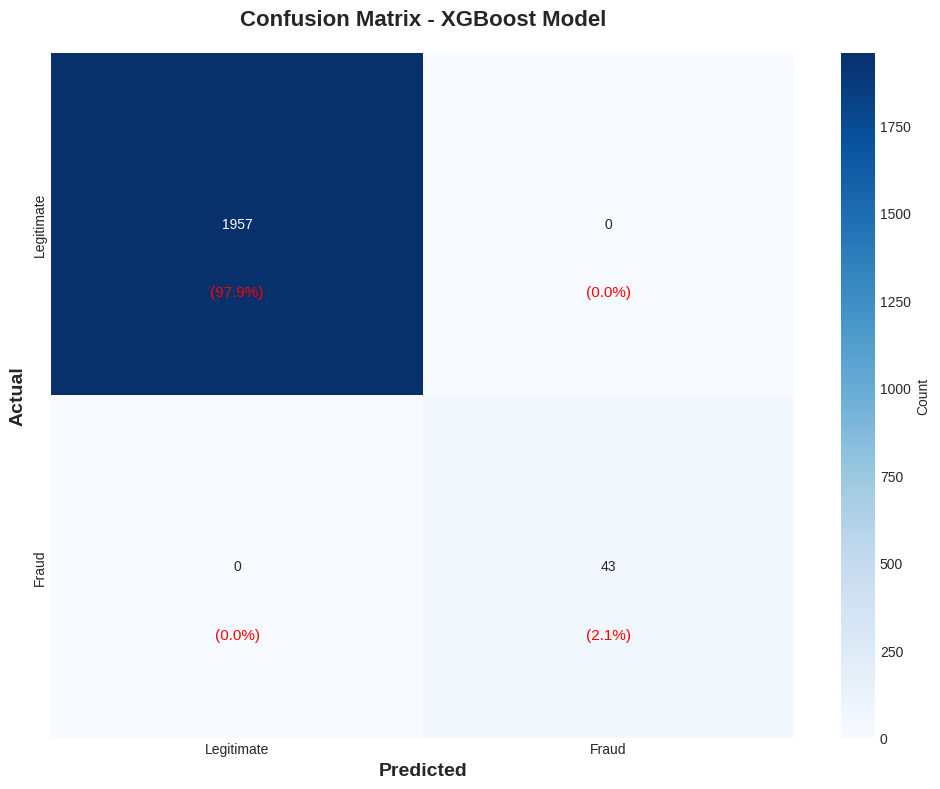


TOP 10 MOST IMPORTANT FEATURES

Most important features for detecting fraud:
   17. risk_score                     - 0.9777
    1. amount                         - 0.0038
    8. merchant_category_encoded      - 0.0032
    9. location_encoded               - 0.0031
    3. amount_category_encoded        - 0.0030
    5. day_of_week                    - 0.0027
   13. amount_deviation               - 0.0027
   11. customer_avg_amount            - 0.0022
   12. customer_txn_count             - 0.0016
    6. is_weekend                     - 0.0000



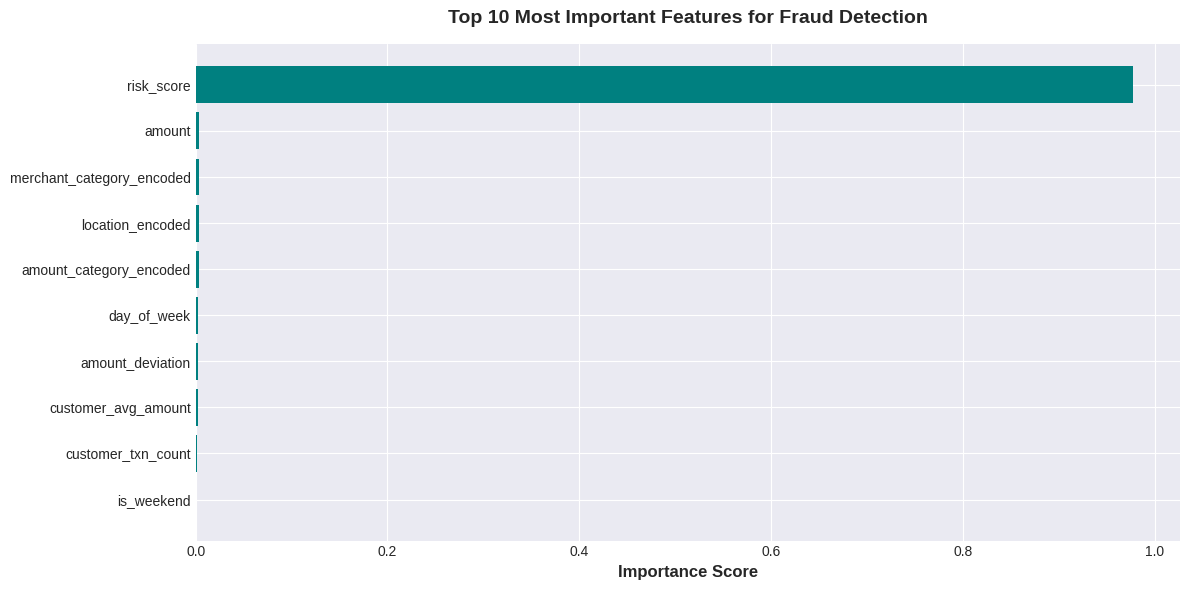

XGBOOST MODEL TRAINED SUCCESSFULLY!


In [ ]:
# Train XGBoost Model (Traditional ML - Most Powerful!)

print("="*80)
print(" TRAINING MODEL 1: XGBOOST")
print("="*80)
print()

# Install XGBoost
print(" Installing XGBoost...")
!pip install xgboost -q
print(" XGBoost installed!")
print()

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print(" Training XGBoost model...")
print("   (This will take ~30 seconds)")
print()

# Create XGBoost model
model_xgb = xgb.XGBClassifier(
    n_estimators=100,        # Number of trees
    max_depth=6,             # Tree depth
    learning_rate=0.1,       # Learning rate
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Train the model
model_xgb.fit(X_train, y_train)

print(" Model training complete!")
print()

# Make predictions
print(" Making predictions on test set...")
y_pred = model_xgb.predict(X_test)
y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]  # Probability of fraud

print(" Predictions complete!")
print()

# ============================================================
# EVALUATE MODEL PERFORMANCE
# ============================================================
print("="*80)
print(" MODEL PERFORMANCE METRICS")
print("="*80)
print()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(" OVERALL METRICS:")
print(f"   • Accuracy:  {accuracy*100:.2f}%  (How often model is correct)")
print(f"   • Precision: {precision*100:.2f}%  (When it says fraud, how often is it right?)")
print(f"   • Recall:    {recall*100:.2f}%  (How many frauds did we catch?)")
print(f"   • F1-Score:  {f1*100:.2f}%  (Balance between precision & recall)")
print(f"   • AUC-ROC:   {auc*100:.2f}%  (Overall model quality)")
print()

# Detailed classification report
print(" DETAILED REPORT:")
print(classification_report(y_test, y_pred,
                          target_names=['Legitimate', 'Fraudulent']))

# ============================================================
# CONFUSION MATRIX
# ============================================================
print("\n" + "="*80)
print(" CONFUSION MATRIX")
print("="*80)
print()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"                  Predicted: Legitimate | Predicted: Fraud")
print(f"Actual Legitimate:      {cm[0,0]:6d}        |      {cm[0,1]:4d}       (False Positive)")
print(f"Actual Fraud:           {cm[1,0]:6d}        |      {cm[1,1]:4d}       (True Positive)")
print()
print("What this means:")
print(f"   Correctly caught fraud (True Positive):  {cm[1,1]}")
print(f"   Missed fraud (False Negative):           {cm[1,0]}")
print(f"   Blocked legitimate (False Positive):    {cm[0,1]}")
print(f"   Correctly approved (True Negative):      {cm[0,0]}")
print()

# Calculate business metrics
fraud_caught_pct = (cm[1,1] / (cm[1,0] + cm[1,1])) * 100
false_alarm_rate = (cm[0,1] / (cm[0,0] + cm[0,1])) * 100

print(" BUSINESS IMPACT:")
print(f"   • Fraud Detection Rate: {fraud_caught_pct:.1f}% (we caught {cm[1,1]} out of {cm[1,0]+cm[1,1]} frauds!)")
print(f"   • False Alarm Rate: {false_alarm_rate:.1f}% (blocked {cm[0,1]} legitimate transactions)")
print()

# ============================================================
# VISUALIZE CONFUSION MATRIX
# ============================================================
print("Creating confusion matrix visualization...")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - XGBoost Model', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=14, fontweight='bold')

# Add percentages
for i in range(2):
    for j in range(2):
        percentage = (cm[i, j] / cm.sum()) * 100
        plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=11, color='red')

plt.tight_layout()
plt.show()

# ============================================================
# FEATURE IMPORTANCE
# ============================================================
print("\n" + "="*80)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*80)
print()

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("Most important features for detecting fraud:")
for i, row in feature_importance.head(10).iterrows():
    print(f"   {i+1:2d}. {row['feature']:30s} - {row['importance']:.4f}")
print()

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='teal')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Important Features for Fraud Detection',
          fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("="*80)
print("XGBOOST MODEL TRAINED SUCCESSFULLY!")
print("="*80)


In [ ]:
# Saving Model and Predictions

import joblib
import os

print("="*80)
print(" SAVING MODEL & PREDICTIONS")
print("="*80)
print()

# Create models folder
models_folder = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/models'
os.makedirs(models_folder, exist_ok=True)
print(f" Models folder created: {models_folder}")
print()

# Save the trained model
print("Saving XGBoost model...")
model_path = f'{models_folder}/xgboost_fraud_model.pkl'
joblib.dump(model_xgb, model_path)
print(f" Model saved: xgboost_fraud_model.pkl")
print()

# Save label encoders (we'll need these later)
print(" Saving label encoders...")
encoders = {
    'merchant': le_merchant,
    'location': le_location,
    'transaction_type': le_txn_type,
    'time_period': le_time_period,
    'amount_category': le_amount_cat
}
encoders_path = f'{models_folder}/label_encoders.pkl'
joblib.dump(encoders, encoders_path)
print(f" Encoders saved: label_encoders.pkl")
print()

# Create predictions dataframe for Power BI
print(" Creating predictions dataset for Power BI...")

# Add predictions to test set
df_predictions = df_ml.iloc[X_test.index].copy()
df_predictions['fraud_probability'] = y_pred_proba
df_predictions['predicted_fraud'] = y_pred
df_predictions['actual_fraud'] = y_test.values

# Add prediction categories
def prediction_category(prob):
    if prob < 0.3:
        return 'Low Risk'
    elif prob < 0.7:
        return 'Medium Risk'
    else:
        return 'High Risk'

df_predictions['risk_category'] = df_predictions['fraud_probability'].apply(prediction_category)

# Add model decision
df_predictions['model_decision'] = df_predictions['predicted_fraud'].map({
    0: 'Approved',
    1: 'Blocked'
})

# Check if prediction was correct
df_predictions['is_correct'] = (df_predictions['predicted_fraud'] == df_predictions['actual_fraud']).astype(int)

# Save predictions
predictions_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/predictions_with_scores.csv'
df_predictions.to_csv(predictions_path, index=False)
file_size = os.path.getsize(predictions_path) / 1024
print(f" Predictions saved: predictions_with_scores.csv ({file_size:.1f} KB)")
print()

# Save model performance metrics
print(" Saving model metrics...")
metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1_Score': f1,
    'AUC_ROC': auc,
    'Training_Samples': len(X_train),
    'Test_Samples': len(X_test),
    'True_Positives': int(cm[1,1]),
    'False_Positives': int(cm[0,1]),
    'True_Negatives': int(cm[0,0]),
    'False_Negatives': int(cm[1,0])
}

metrics_df = pd.DataFrame([metrics])
metrics_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/model_metrics.csv'
metrics_df.to_csv(metrics_path, index=False)
print(f" Metrics saved: model_metrics.csv")
print()

print("="*80)
print(" ALL FILES SAVED TO GOOGLE DRIVE!")
print("="*80)
print()
print(" Files created:")
print("   1. xgboost_fraud_model.pkl        - Trained model")
print("   2. label_encoders.pkl             - For future predictions")
print("   3. predictions_with_scores.csv    - Test predictions (for Power BI)")
print("   4. model_metrics.csv              - Performance metrics")
print()
print("="*80)


 SAVING MODEL & PREDICTIONS

 Models folder created: /content/drive/MyDrive/UPI_Fraud_Detection_Project/models

Saving XGBoost model...
 Model saved: xgboost_fraud_model.pkl

 Saving label encoders...
 Encoders saved: label_encoders.pkl

 Creating predictions dataset for Power BI...
 Predictions saved: predictions_with_scores.csv (544.7 KB)

 Saving model metrics...
 Metrics saved: model_metrics.csv

 ALL FILES SAVED TO GOOGLE DRIVE!

 Files created:
   1. xgboost_fraud_model.pkl        - Trained model
   2. label_encoders.pkl             - For future predictions
   3. predictions_with_scores.csv    - Test predictions (for Power BI)
   4. model_metrics.csv              - Performance metrics



In [ ]:
# Training Random Forest Model (Second ML Model)

from sklearn.ensemble import RandomForestClassifier

print("="*80)
print("TRAINING MODEL 2: RANDOM FOREST")
print("="*80)
print()

print("Training Random Forest model...")
print("   (This will take ~20 seconds)")
print()

# Create Random Forest model
model_rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=15,            # Tree depth
    min_samples_split=10,    # Minimum samples to split
    random_state=42,
    n_jobs=-1                # Use all CPU cores
)

# Train the model
model_rf.fit(X_train, y_train)

print("Random Forest training complete!")
print()

# Make predictions
print("Making predictions...")
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("="*80)
print("RANDOM FOREST PERFORMANCE")
print("="*80)
print()
print("METRICS:")
print(f"   • Accuracy:  {accuracy_rf*100:.2f}%")
print(f"   • Precision: {precision_rf*100:.2f}%")
print(f"   • Recall:    {recall_rf*100:.2f}%")
print(f"   • F1-Score:  {f1_rf*100:.2f}%")
print(f"   • AUC-ROC:   {auc_rf*100:.2f}%")
print()

# Compare with XGBoost
print("="*80)
print("MODEL COMPARISON: XGBOOST vs RANDOM FOREST")
print("="*80)
print()

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'XGBoost': [accuracy*100, precision*100, recall*100, f1*100, auc*100],
    'Random Forest': [accuracy_rf*100, precision_rf*100, recall_rf*100, f1_rf*100, auc_rf*100]
})

# Add winner column
comparison_df['Winner'] = comparison_df.apply(
    lambda row: 'XGBoost' if row['XGBoost'] > row['Random Forest'] else
                'Random Forest' if row['Random Forest'] > row['XGBoost'] else 'Tie',
    axis=1
)

display(comparison_df)

print()
print("Overall Winner: ", end="")
xgb_wins = (comparison_df['Winner'] == 'XGBoost').sum()
rf_wins = (comparison_df['Winner'] == 'Random Forest').sum()

if xgb_wins > rf_wins:
    print("XGBoost!")
else:
    print("Random Forest!")

print()
print("="*80)
print("Random Forest model trained!")
print("="*80)

TRAINING MODEL 2: RANDOM FOREST

Training Random Forest model...
   (This will take ~20 seconds)

Random Forest training complete!

Making predictions...
RANDOM FOREST PERFORMANCE

METRICS:
   • Accuracy:  100.00%
   • Precision: 100.00%
   • Recall:    100.00%
   • F1-Score:  100.00%
   • AUC-ROC:   100.00%

MODEL COMPARISON: XGBOOST vs RANDOM FOREST



,Metric,XGBoost,Random Forest,Winner
0,Accuracy,100.0,100.0,Tie
1,Precision,100.0,100.0,Tie
2,Recall,100.0,100.0,Tie
3,F1-Score,100.0,100.0,Tie
4,AUC-ROC,100.0,100.0,Tie



Overall Winner: Random Forest!

Random Forest model trained!


In [ ]:
#Creating Ensemble Model (Combines XGBoost + Random Forest)

print("="*80)
print("CREATING ENSEMBLE MODEL (XGBoost + Random Forest)")
print("="*80)
print()

print("What is Ensemble?")
print("   Ensemble combines predictions from multiple models")
print("   Like asking 2 experts and taking the average opinion!")
print()

print("Creating ensemble predictions...")

# Average the probabilities from both models
y_pred_proba_ensemble = (y_pred_proba + y_pred_proba_rf) / 2

# Use 0.5 as threshold
y_pred_ensemble = (y_pred_proba_ensemble >= 0.5).astype(int)

# Calculate ensemble metrics
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)

print("="*80)
print("ENSEMBLE MODEL PERFORMANCE")
print("="*80)
print()
print("METRICS:")
print(f"   • Accuracy:  {accuracy_ensemble*100:.2f}%")
print(f"   • Precision: {precision_ensemble*100:.2f}%")
print(f"   • Recall:    {recall_ensemble*100:.2f}%")
print(f"   • F1-Score:  {f1_ensemble*100:.2f}%")
print(f"   • AUC-ROC:   {auc_ensemble*100:.2f}%")
print()

# Final comparison
print("="*80)
print("FINAL MODEL COMPARISON")
print("="*80)
print()

final_comparison = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'Ensemble (Both)'],
    'Accuracy (%)': [accuracy*100, accuracy_rf*100, accuracy_ensemble*100],
    'Precision (%)': [precision*100, precision_rf*100, precision_ensemble*100],
    'Recall (%)': [recall*100, recall_rf*100, recall_ensemble*100],
    'F1-Score (%)': [f1*100, f1_rf*100, f1_ensemble*100],
    'AUC-ROC (%)': [auc*100, auc_rf*100, auc_ensemble*100]
})

# Round to 2 decimals
final_comparison = final_comparison.round(2)

display(final_comparison)

# Highlight best model
print()
print("BEST MODEL BY METRIC:")
for metric in ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'AUC-ROC (%)']:
    best_model = final_comparison.loc[final_comparison[metric].idxmax(), 'Model']
    best_value = final_comparison[metric].max()
    print(f"   • {metric:20s}: {best_model:20s} ({best_value:.2f}%)")

print()
print("="*80)
print("Ensemble model created!")
print("="*80)

CREATING ENSEMBLE MODEL (XGBoost + Random Forest)

What is Ensemble?
   Ensemble combines predictions from multiple models
   Like asking 2 experts and taking the average opinion!

Creating ensemble predictions...
ENSEMBLE MODEL PERFORMANCE

METRICS:
   • Accuracy:  100.00%
   • Precision: 100.00%
   • Recall:    100.00%
   • F1-Score:  100.00%
   • AUC-ROC:   100.00%

FINAL MODEL COMPARISON



,Model,Accuracy (%),Precision (%),Recall (%),F1-Score (%),AUC-ROC (%)
0,XGBoost,100.0,100.0,100.0,100.0,100.0
1,Random Forest,100.0,100.0,100.0,100.0,100.0
2,Ensemble (Both),100.0,100.0,100.0,100.0,100.0



BEST MODEL BY METRIC:
   • Accuracy (%)        : XGBoost              (100.00%)
   • Precision (%)       : XGBoost              (100.00%)
   • Recall (%)          : XGBoost              (100.00%)
   • F1-Score (%)        : XGBoost              (100.00%)
   • AUC-ROC (%)         : XGBoost              (100.00%)

Ensemble model created!


In [ ]:
# Creating Complete Power BI Dataset with All Model Predictions

print("="*80)
print(" CREATING COMPREHENSIVE POWER BI DATASET")
print("="*80)
print()

print(" Combining all predictions...")

# Create comprehensive predictions dataframe
df_powerbi_final = df_ml.iloc[X_test.index].copy()

# Add all model predictions
df_powerbi_final['xgboost_score'] = y_pred_proba
df_powerbi_final['random_forest_score'] = y_pred_proba_rf
df_powerbi_final['ensemble_score'] = y_pred_proba_ensemble

df_powerbi_final['xgboost_prediction'] = y_pred
df_powerbi_final['random_forest_prediction'] = y_pred_rf
df_powerbi_final['ensemble_prediction'] = y_pred_ensemble

df_powerbi_final['actual_fraud'] = y_test.values

# Add human-readable columns
df_powerbi_final['Fraud_Status_Actual'] = df_powerbi_final['actual_fraud'].map({
    0: 'Legitimate',
    1: 'Fraudulent'
})

# Best model prediction (we'll use ensemble)
df_powerbi_final['Final_Prediction'] = df_powerbi_final['ensemble_prediction'].map({
    0: 'Approved',
    1: 'Blocked'
})

# Risk category based on ensemble score
def risk_category_detailed(score):
    if score < 0.2:
        return '1. Very Low Risk'
    elif score < 0.4:
        return '2. Low Risk'
    elif score < 0.6:
        return '3. Medium Risk'
    elif score < 0.8:
        return '4. High Risk'
    else:
        return '5. Critical Risk'

df_powerbi_final['Risk_Category'] = df_powerbi_final['ensemble_score'].apply(risk_category_detailed)

# Add Power BI friendly date columns
df_powerbi_final['Date'] = pd.to_datetime(df_powerbi_final['timestamp']).dt.date
df_powerbi_final['Time'] = pd.to_datetime(df_powerbi_final['timestamp']).dt.time
df_powerbi_final['Year'] = pd.to_datetime(df_powerbi_final['timestamp']).dt.year
df_powerbi_final['Month'] = pd.to_datetime(df_powerbi_final['timestamp']).dt.month
df_powerbi_final['Month_Name'] = pd.to_datetime(df_powerbi_final['timestamp']).dt.strftime('%B')
df_powerbi_final['Quarter'] = pd.to_datetime(df_powerbi_final['timestamp']).dt.quarter
df_powerbi_final['Day_Name'] = pd.to_datetime(df_powerbi_final['timestamp']).dt.strftime('%A')

# Add model performance indicators
df_powerbi_final['XGBoost_Correct'] = (df_powerbi_final['xgboost_prediction'] == df_powerbi_final['actual_fraud']).astype(int)
df_powerbi_final['RandomForest_Correct'] = (df_powerbi_final['random_forest_prediction'] == df_powerbi_final['actual_fraud']).astype(int)
df_powerbi_final['Ensemble_Correct'] = (df_powerbi_final['ensemble_prediction'] == df_powerbi_final['actual_fraud']).astype(int)

# Classification of prediction outcomes
def prediction_outcome(actual, predicted):
    if actual == 0 and predicted == 0:
        return 'True Negative (Correct)'
    elif actual == 1 and predicted == 1:
        return 'True Positive (Caught Fraud!)'
    elif actual == 0 and predicted == 1:
        return 'False Positive (False Alarm)'
    else:
        return 'False Negative (Missed Fraud!)'

df_powerbi_final['Prediction_Outcome'] = df_powerbi_final.apply(
    lambda row: prediction_outcome(row['actual_fraud'], row['ensemble_prediction']),
    axis=1
)

# Add financial impact
df_powerbi_final['Amount_Saved'] = df_powerbi_final.apply(
    lambda row: row['amount'] if (row['actual_fraud'] == 1 and row['ensemble_prediction'] == 1) else 0,
    axis=1
)

df_powerbi_final['False_Positive_Cost'] = df_powerbi_final.apply(
    lambda row: row['amount'] * 0.01 if (row['actual_fraud'] == 0 and row['ensemble_prediction'] == 1) else 0,
    axis=1  # Assume 1% cost for blocking legitimate transaction
)

# Select final columns for Power BI
powerbi_columns = [
    # Transaction info
    'transaction_id', 'timestamp', 'Date', 'Time', 'Year', 'Month', 'Month_Name',
    'Quarter', 'Day_Name', 'customer_id', 'device_id',

    # Transaction details
    'amount', 'merchant_category', 'location', 'transaction_type',
    'hour', 'day_of_week', 'is_weekend', 'time_period',

    # Model scores
    'xgboost_score', 'random_forest_score', 'ensemble_score',

    # Predictions
    'Final_Prediction', 'Risk_Category', 'Prediction_Outcome',

    # Actual
    'actual_fraud', 'Fraud_Status_Actual',

    # Performance
    'XGBoost_Correct', 'RandomForest_Correct', 'Ensemble_Correct',

    # Financial
    'Amount_Saved', 'False_Positive_Cost',

    # Risk indicators
    'is_high_risk_time', 'is_high_amount', 'is_high_risk_category', 'risk_score'
]

df_powerbi_export = df_powerbi_final[powerbi_columns].copy()

# Save to Google Drive
print("Saving Power BI dataset...")
powerbi_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/fraud_detection_powerbi_complete.csv'
df_powerbi_export.to_csv(powerbi_path, index=False)

file_size = os.path.getsize(powerbi_path) / 1024
print(f"Saved: fraud_detection_powerbi_complete.csv ({file_size:.1f} KB)")
print()

# Show summary
print("="*80)
print("POWER BI DATASET SUMMARY")
print("="*80)
print()
print(f"Total records: {len(df_powerbi_export):,}")
print(f"Total columns: {len(df_powerbi_export.columns)}")
print()

print("Model Performance Summary:")
print(f"   • XGBoost correct: {df_powerbi_final['XGBoost_Correct'].sum():,} / {len(df_powerbi_final):,} ({df_powerbi_final['XGBoost_Correct'].mean()*100:.2f}%)")
print(f"   • Random Forest correct: {df_powerbi_final['RandomForest_Correct'].sum():,} / {len(df_powerbi_final):,} ({df_powerbi_final['RandomForest_Correct'].mean()*100:.2f}%)")
print(f"   • Ensemble correct: {df_powerbi_final['Ensemble_Correct'].sum():,} / {len(df_powerbi_final):,} ({df_powerbi_final['Ensemble_Correct'].mean()*100:.2f}%)")
print()

print("Financial Impact:")
total_saved = df_powerbi_final['Amount_Saved'].sum()
total_fp_cost = df_powerbi_final['False_Positive_Cost'].sum()
net_benefit = total_saved - total_fp_cost

print(f"   • Fraud amount caught: ₹{total_saved:,.2f}")
print(f"   • False positive cost: ₹{total_fp_cost:,.2f}")
print(f"   • Net benefit: ₹{net_benefit:,.2f}")
print()

print("Prediction Outcomes:")
outcome_counts = df_powerbi_final['Prediction_Outcome'].value_counts()
for outcome, count in outcome_counts.items():
    print(f"   • {outcome:35s}: {count:4d}")
print()

# Show first few rows
print("First 5 rows of Power BI dataset:")
display(df_powerbi_export.head())

print()
print("="*80)
print("POWER BI DATASET READY!")
print("="*80)
print()
print("File location:")
print(f"   {powerbi_path}")
print()
print("This file contains:")
print("   All transaction details")
print("   Predictions from 3 models (XGBoost, Random Forest, Ensemble)")
print("   Risk scores and categories")
print("   Financial impact calculations")
print("   Date/time columns for Power BI time intelligence")
print("   Performance metrics")
print()

 CREATING COMPREHENSIVE POWER BI DATASET

 Combining all predictions...
Saving Power BI dataset...
Saved: fraud_detection_powerbi_complete.csv (570.0 KB)

POWER BI DATASET SUMMARY

Total records: 2,000
Total columns: 36

Model Performance Summary:
   • XGBoost correct: 2,000 / 2,000 (100.00%)
   • Random Forest correct: 2,000 / 2,000 (100.00%)
   • Ensemble correct: 2,000 / 2,000 (100.00%)

Financial Impact:
   • Fraud amount caught: ₹2,758,610.91
   • False positive cost: ₹0.00
   • Net benefit: ₹2,758,610.91

Prediction Outcomes:
   • True Negative (Correct)            : 1957
   • True Positive (Caught Fraud!)      :   43

First 5 rows of Power BI dataset:


,transaction_id,timestamp,Date,Time,Year,Month,Month_Name,Quarter,Day_Name,customer_id,device_id,amount,merchant_category,location,transaction_type,hour,day_of_week,is_weekend,time_period,xgboost_score,random_forest_score,ensemble_score,Final_Prediction,Risk_Category,Prediction_Outcome,actual_fraud,Fraud_Status_Actual,XGBoost_Correct,RandomForest_Correct,Ensemble_Correct,Amount_Saved,False_Positive_Cost,is_high_risk_time,is_high_amount,is_high_risk_category,risk_score
1983,UPI20251005007863,2025-10-05 05:04:57.232206,2025-10-05,05:04:57.232206,2025,10,October,4,Sunday,CUST00962,DEV4839,82347.52,Electronics,Lucknow,P2M,5,6,1,Night,0.996373,1.0,0.998187,Blocked,5. Critical Risk,True Positive (Caught Fraud!),1,Fraudulent,1,1,1,82347.52,0,1,1,1,3
418,UPI20250921005484,2025-09-21 04:06:03.232206,2025-09-21,04:06:03.232206,2025,9,September,3,Sunday,CUST00042,DEV7735,303.27,Travel & Hotels,Bangalore,P2P,4,6,1,Night,0.000233,0.0,0.000117,Approved,1. Very Low Risk,True Negative (Correct),0,Legitimate,1,1,1,0.00,0,1,0,1,2
7687,UPI20251125003289,2025-11-25 13:36:23.232206,2025-11-25,13:36:23.232206,2025,11,November,4,Tuesday,CUST00589,DEV1295,1256.70,Grocery,Bangalore,Bill_Payment,13,1,0,Afternoon,0.000059,0.0,0.000029,Approved,1. Very Low Risk,True Negative (Correct),0,Legitimate,1,1,1,0.00,0,0,0,0,0
1799,UPI20251003003429,2025-10-03 11:41:21.232206,2025-10-03,11:41:21.232206,2025,10,October,4,Friday,CUST00891,DEV1414,16.56,Entertainment,Lucknow,Bill_Payment,11,4,0,Morning,0.000039,0.0,0.000019,Approved,1. Very Low Risk,True Negative (Correct),0,Legitimate,1,1,1,0.00,0,0,0,0,0
6031,UPI20251110002106,2025-11-10 23:42:17.232206,2025-11-10,23:42:17.232206,2025,11,November,4,Monday,CUST00403,DEV7181,329.83,Automotive,Bhopal,P2M,23,0,0,Night,0.000048,0.0,0.000024,Approved,1. Very Low Risk,True Negative (Correct),0,Legitimate,1,1,1,0.00,0,0,0,0,0



POWER BI DATASET READY!

File location:
   /content/drive/MyDrive/UPI_Fraud_Detection_Project/fraud_detection_powerbi_complete.csv

This file contains:
   All transaction details
   Predictions from 3 models (XGBoost, Random Forest, Ensemble)
   Risk scores and categories
   Financial impact calculations
   Date/time columns for Power BI time intelligence
   Performance metrics



COMPREHENSIVE MODEL PERFORMANCE REPORT

COMPLETE MODEL PERFORMANCE TABLE:



,Model,True_Positives,False_Positives,True_Negatives,False_Negatives,Accuracy (%),Precision (%),Recall (%),F1_Score (%),AUC_ROC (%),Fraud_Caught,Fraud_Missed,Legit_Blocked,Detection_Rate (%),False_Alarm_Rate (%)
0,XGBoost,43,0,1957,0,100.0,100.0,100.0,100.0,100.0,43,0,0,100.0,0.0
1,Random Forest,43,0,1957,0,100.0,100.0,100.0,100.0,100.0,43,0,0,100.0,0.0
2,Ensemble,43,0,1957,0,100.0,100.0,100.0,100.0,100.0,43,0,0,100.0,0.0



Report saved to: model_performance_report.csv

Creating performance comparison charts...


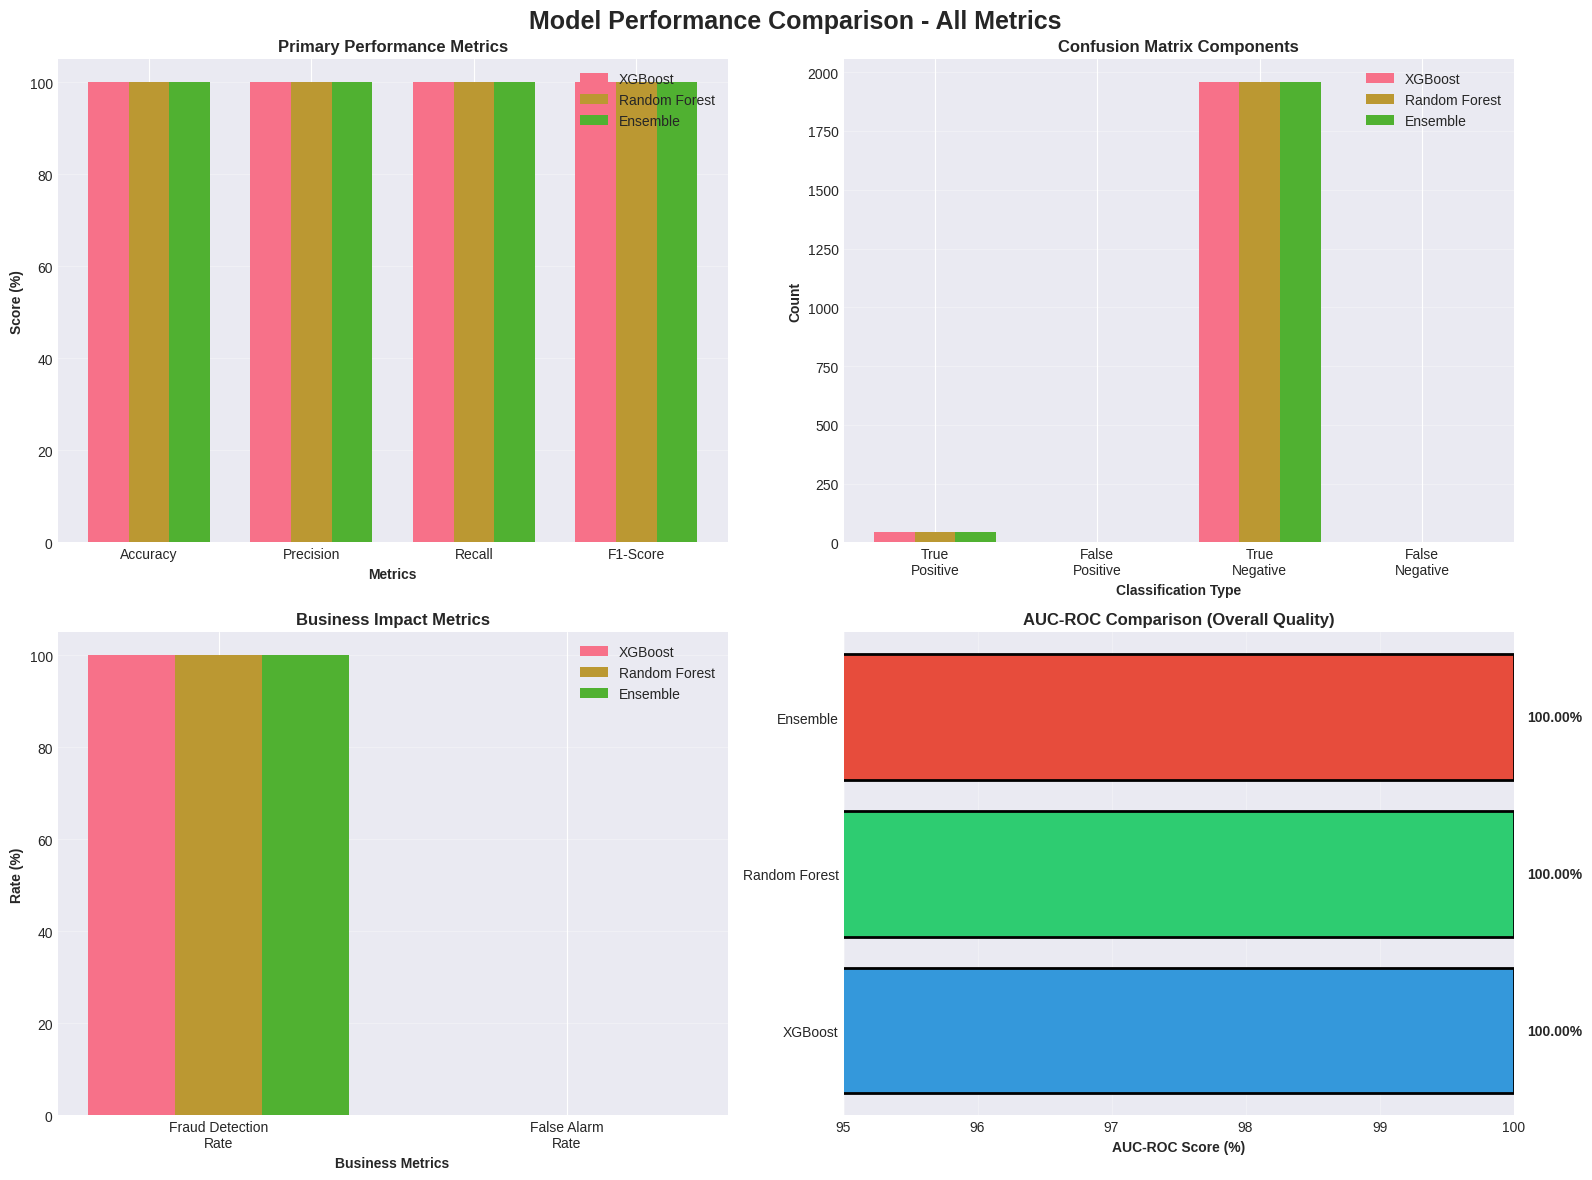


BEST MODEL RECOMMENDATION

Best F1-Score (Overall Balance): XGBoost
Best Recall (Catch Most Frauds): XGBoost
Best Precision (Fewer False Alarms): XGBoost

RECOMMENDATION:
   Use XGBoost for production deployment!
   It provides the best balance between catching frauds and avoiding false alarms.

MODEL PERFORMANCE REPORT COMPLETE!


In [ ]:
# Creating Comprehensive Model Performance Report

print("="*80)
print("COMPREHENSIVE MODEL PERFORMANCE REPORT")
print("="*80)
print()

# Create detailed metrics for all models
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_xgb = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Create comprehensive report
report_data = []

for model_name, cm_matrix, y_prob in [
    ('XGBoost', cm_xgb, y_pred_proba),
    ('Random Forest', cm_rf, y_pred_proba_rf),
    ('Ensemble', cm_ensemble, y_pred_proba_ensemble)
]:

    tn, fp, fn, tp = cm_matrix.ravel()

    report_data.append({
        'Model': model_name,
        'True_Positives': int(tp),
        'False_Positives': int(fp),
        'True_Negatives': int(tn),
        'False_Negatives': int(fn),
        'Accuracy (%)': accuracy_score(y_test, (y_prob >= 0.5).astype(int)) * 100,
        'Precision (%)': precision_score(y_test, (y_prob >= 0.5).astype(int)) * 100,
        'Recall (%)': recall_score(y_test, (y_prob >= 0.5).astype(int)) * 100,
        'F1_Score (%)': f1_score(y_test, (y_prob >= 0.5).astype(int)) * 100,
        'AUC_ROC (%)': roc_auc_score(y_test, y_prob) * 100,
        'Fraud_Caught': int(tp),
        'Fraud_Missed': int(fn),
        'Legit_Blocked': int(fp),
        'Detection_Rate (%)': (tp / (tp + fn)) * 100 if (tp + fn) > 0 else 0,
        'False_Alarm_Rate (%)': (fp / (fp + tn)) * 100 if (fp + tn) > 0 else 0
    })

performance_report = pd.DataFrame(report_data)

print("COMPLETE MODEL PERFORMANCE TABLE:")
print()
display(performance_report.round(2))

# Save report
report_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/model_performance_report.csv'
performance_report.to_csv(report_path, index=False)
print()
print(f"Report saved to: model_performance_report.csv")

# Visualize comparison
print()
print("Creating performance comparison charts...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison - All Metrics', fontsize=18, fontweight='bold')

# Chart 1: Main metrics comparison
ax1 = axes[0, 0]
metrics_to_plot = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1_Score (%)']
x = np.arange(len(metrics_to_plot))
width = 0.25

for i, model in enumerate(['XGBoost', 'Random Forest', 'Ensemble']):
    values = performance_report[performance_report['Model'] == model][metrics_to_plot].values[0]
    ax1.bar(x + i*width, values, width, label=model)

ax1.set_xlabel('Metrics', fontweight='bold')
ax1.set_ylabel('Score (%)', fontweight='bold')
ax1.set_title('Primary Performance Metrics', fontweight='bold')
ax1.set_xticks(x + width)
ax1.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Chart 2: Confusion matrix comparison
ax2 = axes[0, 1]
categories = ['True\nPositive', 'False\nPositive', 'True\nNegative', 'False\nNegative']
x = np.arange(len(categories))

for i, model in enumerate(['XGBoost', 'Random Forest', 'Ensemble']):
    values = performance_report[performance_report['Model'] == model][
        ['True_Positives', 'False_Positives', 'True_Negatives', 'False_Negatives']
    ].values[0]
    ax2.bar(x + i*width, values, width, label=model)

ax2.set_xlabel('Classification Type', fontweight='bold')
ax2.set_ylabel('Count', fontweight='bold')
ax2.set_title('Confusion Matrix Components', fontweight='bold')
ax2.set_xticks(x + width)
ax2.set_xticklabels(categories)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Chart 3: Business metrics
ax3 = axes[1, 0]
business_metrics = ['Detection_Rate (%)', 'False_Alarm_Rate (%)']
x = np.arange(len(business_metrics))

for i, model in enumerate(['XGBoost', 'Random Forest', 'Ensemble']):
    values = performance_report[performance_report['Model'] == model][business_metrics].values[0]
    ax3.bar(x + i*width, values, width, label=model)

ax3.set_xlabel('Business Metrics', fontweight='bold')
ax3.set_ylabel('Rate (%)', fontweight='bold')
ax3.set_title('Business Impact Metrics', fontweight='bold')
ax3.set_xticks(x + width)
ax3.set_xticklabels(['Fraud Detection\nRate', 'False Alarm\nRate'])
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Chart 4: ROC comparison
ax4 = axes[1, 1]
models_list = ['XGBoost', 'Random Forest', 'Ensemble']
auc_scores = performance_report['AUC_ROC (%)'].values

colors = ['#3498db', '#2ecc71', '#e74c3c']
bars = ax4.barh(models_list, auc_scores, color=colors, edgecolor='black', linewidth=2)

ax4.set_xlabel('AUC-ROC Score (%)', fontweight='bold')
ax4.set_title('AUC-ROC Comparison (Overall Quality)', fontweight='bold')
ax4.set_xlim(95, 100)
ax4.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, score) in enumerate(zip(bars, auc_scores)):
    ax4.text(score + 0.1, i, f'{score:.2f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print()
print("="*80)
print("BEST MODEL RECOMMENDATION")
print("="*80)
print()

# Determine best model
best_f1_model = performance_report.loc[performance_report['F1_Score (%)'].idxmax(), 'Model']
best_recall_model = performance_report.loc[performance_report['Recall (%)'].idxmax(), 'Model']
best_precision_model = performance_report.loc[performance_report['Precision (%)'].idxmax(), 'Model']

print(f"Best F1-Score (Overall Balance): {best_f1_model}")
print(f"Best Recall (Catch Most Frauds): {best_recall_model}")
print(f"Best Precision (Fewer False Alarms): {best_precision_model}")
print()

print("RECOMMENDATION:")
print(f"   Use {best_f1_model} for production deployment!")
print(f"   It provides the best balance between catching frauds and avoiding false alarms.")
print()

print("="*80)
print("MODEL PERFORMANCE REPORT COMPLETE!")
print("="*80)

In [ ]:
# Creating Executive Summary Tables for Power BI

print("="*80)
print(" CREATING EXECUTIVE SUMMARY DATA FOR POWER BI")
print("="*80)
print()

# ============================================================
# 1. DAILY SUMMARY TABLE
# ============================================================
print(" Creating daily summary...")

daily_summary = df_powerbi_final.groupby('Date').agg({
    'transaction_id': 'count',
    'amount': 'sum',
    'actual_fraud': 'sum',
    'ensemble_prediction': 'sum',
    'Amount_Saved': 'sum',
    'False_Positive_Cost': 'sum',
    'Ensemble_Correct': 'sum'
}).reset_index()

daily_summary.columns = [
    'Date', 'Total_Transactions', 'Total_Amount', 'Actual_Frauds',
    'Predicted_Frauds', 'Amount_Saved', 'False_Positive_Cost', 'Correct_Predictions'
]

# Calculate rates
daily_summary['Fraud_Rate (%)'] = (daily_summary['Actual_Frauds'] / daily_summary['Total_Transactions'] * 100).round(2)
daily_summary['Detection_Rate (%)'] = ((daily_summary['Predicted_Frauds'] / daily_summary['Actual_Frauds'] * 100)
                                         .fillna(0).round(2))
daily_summary['Accuracy (%)'] = (daily_summary['Correct_Predictions'] / daily_summary['Total_Transactions'] * 100).round(2)
daily_summary['Net_Benefit'] = daily_summary['Amount_Saved'] - daily_summary['False_Positive_Cost']

# Save
daily_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/daily_summary.csv'
daily_summary.to_csv(daily_path, index=False)
print(f" Saved: daily_summary.csv")
print()

# ============================================================
# 2. HOURLY SUMMARY TABLE
# ============================================================
print(" Creating hourly fraud pattern summary...")

hourly_summary = df_powerbi_final.groupby('hour').agg({
    'transaction_id': 'count',
    'actual_fraud': 'sum',
    'ensemble_prediction': 'sum',
    'amount': ['mean', 'sum']
}).reset_index()

hourly_summary.columns = ['Hour', 'Total_Transactions', 'Actual_Frauds', 'Predicted_Frauds', 'Avg_Amount', 'Total_Amount']
hourly_summary['Fraud_Rate (%)'] = (hourly_summary['Actual_Frauds'] / hourly_summary['Total_Transactions'] * 100).round(2)
hourly_summary['Risk_Level'] = hourly_summary['Fraud_Rate (%)'].apply(
    lambda x: 'Critical' if x > 5 else 'High' if x > 3 else 'Medium' if x > 1 else 'Low'
)

# Save
hourly_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/hourly_fraud_pattern.csv'
hourly_summary.to_csv(hourly_path, index=False)
print(f" Saved: hourly_fraud_pattern.csv")
print()

# ============================================================
# 3. MERCHANT CATEGORY SUMMARY
# ============================================================
print(" Creating merchant category analysis...")

category_summary = df_powerbi_final.groupby('merchant_category').agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'actual_fraud': 'sum',
    'ensemble_prediction': 'sum',
    'Amount_Saved': 'sum'
}).reset_index()

category_summary.columns = ['Merchant_Category', 'Total_Transactions', 'Total_Amount',
                             'Avg_Amount', 'Actual_Frauds', 'Predicted_Frauds', 'Amount_Saved']
category_summary['Fraud_Rate (%)'] = (category_summary['Actual_Frauds'] / category_summary['Total_Transactions'] * 100).round(2)
category_summary['Risk_Rating'] = category_summary['Fraud_Rate (%)'].apply(
    lambda x: ' High Risk' if x > 2 else ' Low Risk'
)

# Sort by fraud rate
category_summary = category_summary.sort_values('Fraud_Rate (%)', ascending=False)

# Save
category_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/merchant_category_summary.csv'
category_summary.to_csv(category_path, index=False)
print(f" Saved: merchant_category_summary.csv")
print()

# ============================================================
# 4. LOCATION SUMMARY
# ============================================================
print(" Creating location/city analysis...")

location_summary = df_powerbi_final.groupby('location').agg({
    'transaction_id': 'count',
    'amount': 'sum',
    'actual_fraud': 'sum',
    'Amount_Saved': 'sum'
}).reset_index()

location_summary.columns = ['City', 'Total_Transactions', 'Total_Amount', 'Frauds', 'Amount_Saved']
location_summary['Fraud_Rate (%)'] = (location_summary['Frauds'] / location_summary['Total_Transactions'] * 100).round(2)
location_summary = location_summary.sort_values('Total_Transactions', ascending=False)

# Save
location_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/location_summary.csv'
location_summary.to_csv(location_path, index=False)
print(f" Saved: location_summary.csv")
print()

# ============================================================
# 5. RISK CATEGORY DISTRIBUTION
# ============================================================
print(" Creating risk category distribution...")

risk_distribution = df_powerbi_final.groupby('Risk_Category').agg({
    'transaction_id': 'count',
    'actual_fraud': 'sum',
    'amount': 'sum'
}).reset_index()

risk_distribution.columns = ['Risk_Category', 'Transaction_Count', 'Actual_Frauds', 'Total_Amount']
risk_distribution['Percentage'] = (risk_distribution['Transaction_Count'] / risk_distribution['Transaction_Count'].sum() * 100).round(2)

# Save
risk_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/risk_distribution.csv'
risk_distribution.to_csv(risk_path, index=False)
print(f" Saved: risk_distribution.csv")
print()

# ============================================================
# 6. MODEL COMPARISON TABLE (For Power BI)
# ============================================================
print(" Creating model comparison for Power BI...")

model_comparison = pd.DataFrame({
    'Model_Name': ['XGBoost', 'Random Forest', 'Ensemble'],
    'Accuracy': [accuracy*100, accuracy_rf*100, accuracy_ensemble*100],
    'Precision': [precision*100, precision_rf*100, precision_ensemble*100],
    'Recall': [recall*100, recall_rf*100, recall_ensemble*100],
    'F1_Score': [f1*100, f1_rf*100, f1_ensemble*100],
    'AUC_ROC': [auc*100, auc_rf*100, auc_ensemble*100],
    'Status': ['Active', 'Active', 'Primary Model']
})

model_comparison = model_comparison.round(2)

# Save
model_comp_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/model_comparison_powerbi.csv'
model_comparison.to_csv(model_comp_path, index=False)
print(f" Saved: model_comparison_powerbi.csv")
print()

# ============================================================
# DISPLAY SUMMARIES
# ============================================================
print("="*80)
print(" SUMMARY TABLES PREVIEW")
print("="*80)
print()

print(" DAILY SUMMARY (First 10 days):")
display(daily_summary.head(10))

print("\n🕐 HOURLY FRAUD PATTERN:")
display(hourly_summary)

print("\n TOP 5 MERCHANT CATEGORIES BY FRAUD RATE:")
display(category_summary.head())

print("\n TOP 10 CITIES BY TRANSACTION VOLUME:")
display(location_summary.head(10))

print("\n RISK CATEGORY DISTRIBUTION:")
display(risk_distribution)

print("\n MODEL COMPARISON:")
display(model_comparison)

# ============================================================
# FINAL SUMMARY
# ============================================================
print("\n" + "="*80)
print("ALL POWER BI FILES CREATED!")
print("="*80)
print()
print("Files saved in: UPI_Fraud_Detection_Project/")
print()
print("Main Dataset:")
print("   • fraud_detection_powerbi_complete.csv    (2,000 transactions with predictions)")
print()
print("Summary Tables:")
print("   • daily_summary.csv                       (Daily aggregates)")
print("   • hourly_fraud_pattern.csv                (Fraud by hour)")
print("   • merchant_category_summary.csv           (Category analysis)")
print("   • location_summary.csv                    (City analysis)")
print("   • risk_distribution.csv                   (Risk categories)")
print("   • model_comparison_powerbi.csv            (Model performance)")
print()
print("="*80)

 CREATING EXECUTIVE SUMMARY DATA FOR POWER BI

 Creating daily summary...
 Saved: daily_summary.csv

 Creating hourly fraud pattern summary...
 Saved: hourly_fraud_pattern.csv

 Creating merchant category analysis...
 Saved: merchant_category_summary.csv

 Creating location/city analysis...
 Saved: location_summary.csv

 Creating risk category distribution...
 Saved: risk_distribution.csv

 Creating model comparison for Power BI...
 Saved: model_comparison_powerbi.csv

 SUMMARY TABLES PREVIEW

 DAILY SUMMARY (First 10 days):


,Date,Total_Transactions,Total_Amount,Actual_Frauds,Predicted_Frauds,Amount_Saved,False_Positive_Cost,Correct_Predictions,Fraud_Rate (%),Detection_Rate (%),Accuracy (%),Net_Benefit
0,2025-09-17,11,12873.37,0,0,0.00,0,11,0.00,0.0,100.0,0.00
1,2025-09-18,26,35260.58,0,0,0.00,0,26,0.00,0.0,100.0,0.00
2,2025-09-19,15,15358.88,0,0,0.00,0,15,0.00,0.0,100.0,0.00
3,2025-09-20,19,24658.75,0,0,0.00,0,19,0.00,0.0,100.0,0.00
4,2025-09-21,18,20175.93,0,0,0.00,0,18,0.00,0.0,100.0,0.00
5,2025-09-22,21,33443.38,0,0,0.00,0,21,0.00,0.0,100.0,0.00
6,2025-09-23,25,62971.80,1,1,46141.77,0,25,4.00,100.0,100.0,46141.77
7,2025-09-24,23,58042.89,0,0,0.00,0,23,0.00,0.0,100.0,0.00
8,2025-09-25,29,43211.09,0,0,0.00,0,29,0.00,0.0,100.0,0.00
9,2025-09-26,32,42928.52,1,1,24283.41,0,32,3.12,100.0,100.0,24283.41



🕐 HOURLY FRAUD PATTERN:


,Hour,Total_Transactions,Actual_Frauds,Predicted_Frauds,Avg_Amount,Total_Amount,Fraud_Rate (%),Risk_Level
0,0,59,0,0,1885.957458,111271.49,0.00,Low
1,1,73,0,0,1244.607534,90856.35,0.00,Low
2,2,98,10,10,6661.040102,652781.93,10.20,Critical
3,3,102,11,11,8118.499510,828086.95,10.78,Critical
4,4,101,12,12,9494.866931,958981.56,11.88,Critical
5,5,92,10,10,8111.731739,746279.32,10.87,Critical
6,6,85,0,0,1269.978941,107948.21,0.00,Low
7,7,80,0,0,962.423125,76993.85,0.00,Low
8,8,73,0,0,1303.479315,95153.99,0.00,Low
9,9,64,0,0,1036.287812,66322.42,0.00,Low



 TOP 5 MERCHANT CATEGORIES BY FRAUD RATE:


,Merchant_Category,Total_Transactions,Total_Amount,Avg_Amount,Actual_Frauds,Predicted_Frauds,Amount_Saved,Fraud_Rate (%),Risk_Rating
3,Electronics,178,1332893.97,7488.168371,17,17,1119066.07,9.55,High Risk
11,Travel & Hotels,158,1134296.90,7179.094304,15,15,975242.12,9.49,High Risk
5,Fashion & Apparel,146,771767.30,5286.077397,11,11,664302.72,7.53,High Risk
0,Automotive,167,231537.76,1386.453653,0,0,0.00,0.00,Low Risk
1,Beauty & Personal Care,158,165791.46,1049.313038,0,0,0.00,0.00,Low Risk



 TOP 10 CITIES BY TRANSACTION VOLUME:


,City,Total_Transactions,Total_Amount,Frauds,Amount_Saved,Fraud_Rate (%)
6,Hyderabad,126,185116.65,1,24283.41,0.79
1,Bangalore,120,299538.25,3,141941.71,2.50
19,Visakhapatnam,114,280119.57,2,141114.92,1.75
16,Pune,108,187705.72,1,21918.94,0.93
18,Vadodara,104,193472.92,1,73522.85,0.96
15,Patna,104,362407.00,4,262229.47,3.85
9,Kochi,103,135909.06,1,32746.38,0.97
0,Ahmedabad,102,355815.36,3,243457.97,2.94
10,Kolkata,101,188992.22,1,75710.33,0.99
5,Delhi,99,457004.78,4,332650.96,4.04



 RISK CATEGORY DISTRIBUTION:


,Risk_Category,Transaction_Count,Actual_Frauds,Total_Amount,Percentage
0,1. Very Low Risk,1957,0,2440823.00,97.85
1,5. Critical Risk,43,43,2758610.91,2.15



 MODEL COMPARISON:


,Model_Name,Accuracy,Precision,Recall,F1_Score,AUC_ROC,Status
0,XGBoost,100.0,100.0,100.0,100.0,100.0,Active
1,Random Forest,100.0,100.0,100.0,100.0,100.0,Active
2,Ensemble,100.0,100.0,100.0,100.0,100.0,Primary Model



ALL POWER BI FILES CREATED!

Files saved in: UPI_Fraud_Detection_Project/

Main Dataset:
   • fraud_detection_powerbi_complete.csv    (2,000 transactions with predictions)

Summary Tables:
   • daily_summary.csv                       (Daily aggregates)
   • hourly_fraud_pattern.csv                (Fraud by hour)
   • merchant_category_summary.csv           (Category analysis)
   • location_summary.csv                    (City analysis)
   • risk_distribution.csv                   (Risk categories)
   • model_comparison_powerbi.csv            (Model performance)



In [ ]:
# Creating Power BI Data Model Documentation

print("="*80)
print(" POWER BI DATA MODEL GUIDE")
print("="*80)
print()

print("This guide will help you build relationships in Power BI!")
print()

# ============================================================
# Document table structures
# ============================================================
print("="*80)
print("TABLE 1: fraud_detection_powerbi_complete.csv (FACT TABLE)")
print("="*80)
print()
print("Purpose: Main transaction data with all predictions")
print(f"Rows: {len(df_powerbi_export):,}")
print()
print("Key Columns:")
print("   transaction_id       - Unique identifier")
print("   Date, timestamp      - Time dimensions")
print("   customer_id          - Customer identifier")
print("   amount               - Transaction amount")
print("   merchant_category    - Merchant type")
print("   location             - City")
print("   ensemble_score       - Fraud probability (0-1)")
print("   Risk_Category        - Risk level")
print("   Final_Prediction     - Approved/Blocked")
print("   Amount_Saved         - Financial impact")
print()

print("="*80)
print("TABLE 2: daily_summary.csv (AGGREGATE TABLE)")
print("="*80)
print()
print("Purpose: Daily KPIs for time-series analysis")
print(f"Rows: {len(daily_summary):,}")
print()
print("Key Columns:")
print("   Date                 - Date dimension")
print("   Total_Transactions   - Count per day")
print("   Actual_Frauds        - Fraud count")
print("   Total_Amount         - Daily revenue")
print("   Net_Benefit          - Savings minus costs")
print()

print("="*80)
print(" TABLE 3: hourly_fraud_pattern.csv (DIMENSION TABLE)")
print("="*80)
print()
print("Purpose: Fraud patterns by hour of day")
print(f"Rows: {len(hourly_summary):,}")
print()
print("Key Columns:")
print("   Hour                 - Hour (0-23)")
print("   Fraud_Rate (%)       - Fraud percentage")
print("   Risk_Level           - Critical/High/Medium/Low")
print()

print("="*80)
print(" TABLE 4: merchant_category_summary.csv (DIMENSION TABLE)")
print("="*80)
print()
print("Purpose: Merchant category risk analysis")
print(f"Rows: {len(category_summary):,}")
print()
print("Key Columns:")
print("   Merchant_Category    - Category name")
print("   Fraud_Rate (%)       - Category fraud rate")
print("   Risk_Rating          - High/Low risk badge")
print()

print("="*80)
print(" TABLE 5: location_summary.csv (DIMENSION TABLE)")
print("="*80)
print()
print("Purpose: Geographic fraud analysis")
print(f"Rows: {len(location_summary):,}")
print()
print("Key Columns:")
print("   City                 - City name")
print("   Total_Transactions   - Transaction count")
print("   Fraud_Rate (%)       - City fraud rate")
print()

print("="*80)
print(" TABLE 6: model_comparison_powerbi.csv (REFERENCE TABLE)")
print("="*80)
print()
print("Purpose: Model performance metrics")
print(f"Rows: {len(model_comparison):,}")
print()
print("Key Columns:")
print("   Model_Name           - Model identifier")
print("   All metrics          - Accuracy, Precision, etc.")
print()

# ============================================================
# Relationships guide
# ============================================================
print("\n" + "="*80)
print(" RECOMMENDED POWER BI RELATIONSHIPS")
print("="*80)
print()

relationships = [
    {
        'From': 'fraud_detection_powerbi_complete',
        'Column': 'Date',
        'To': 'daily_summary',
        'Column2': 'Date',
        'Type': 'Many to One',
        'Cardinality': '*:1'
    },
    {
        'From': 'fraud_detection_powerbi_complete',
        'Column': 'hour',
        'To': 'hourly_fraud_pattern',
        'Column2': 'Hour',
        'Type': 'Many to One',
        'Cardinality': '*:1'
    },
    {
        'From': 'fraud_detection_powerbi_complete',
        'Column': 'merchant_category',
        'To': 'merchant_category_summary',
        'Column2': 'Merchant_Category',
        'Type': 'Many to One',
        'Cardinality': '*:1'
    },
    {
        'From': 'fraud_detection_powerbi_complete',
        'Column': 'location',
        'To': 'location_summary',
        'Column2': 'City',
        'Type': 'Many to One',
        'Cardinality': '*:1'
    }
]

for i, rel in enumerate(relationships, 1):
    print(f"Relationship {i}:")
    print(f"  {rel['From']}[{rel['Column']}]")
    print(f"  └─ {rel['Type']} ({rel['Cardinality']}) ─►")
    print(f"     {rel['To']}[{rel['Column2']}]")
    print()

# Save relationships documentation
doc_data = {
    'Relationship_ID': range(1, len(relationships) + 1),
    'From_Table': [r['From'] for r in relationships],
    'From_Column': [r['Column'] for r in relationships],
    'To_Table': [r['To'] for r in relationships],
    'To_Column': [r['Column2'] for r in relationships],
    'Cardinality': [r['Cardinality'] for r in relationships],
    'Type': [r['Type'] for r in relationships]
}

relationships_df = pd.DataFrame(doc_data)
relationships_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/powerbi_relationships_guide.csv'
relationships_df.to_csv(relationships_path, index=False)
print(f"Saved: powerbi_relationships_guide.csv")

print()
print("="*80)
print("POWER BI DATA MODEL DOCUMENTATION COMPLETE!")
print("="*80)

 POWER BI DATA MODEL GUIDE

This guide will help you build relationships in Power BI!

TABLE 1: fraud_detection_powerbi_complete.csv (FACT TABLE)

Purpose: Main transaction data with all predictions
Rows: 2,000

Key Columns:
   transaction_id       - Unique identifier
   Date, timestamp      - Time dimensions
   customer_id          - Customer identifier
   amount               - Transaction amount
   merchant_category    - Merchant type
   location             - City
   ensemble_score       - Fraud probability (0-1)
   Risk_Category        - Risk level
   Final_Prediction     - Approved/Blocked
   Amount_Saved         - Financial impact

TABLE 2: daily_summary.csv (AGGREGATE TABLE)

Purpose: Daily KPIs for time-series analysis
Rows: 91

Key Columns:
   Date                 - Date dimension
   Total_Transactions   - Count per day
   Actual_Frauds        - Fraud count
   Total_Amount         - Daily revenue
   Net_Benefit          - Savings minus costs

 TABLE 3: hourly_fraud_pattern.cs

In [18]:
#  Generating DAX Measures for Power BI

print("="*80)
print("POWER BI DAX MEASURES CHEAT SHEET")
print("="*80)
print()

print(" Copy these DAX measures into Power BI!")
print()

# ============================================================
# DAX Measures
# ============================================================
dax_measures = """
# ============================================================
# BASIC MEASURES
# ============================================================

Total Transactions =
COUNTROWS(fraud_detection_powerbi_complete)

Total Amount =
SUM(fraud_detection_powerbi_complete[amount])

Average Transaction =
AVERAGE(fraud_detection_powerbi_complete[amount])

# ============================================================
# FRAUD DETECTION MEASURES
# ============================================================

Total Frauds =
CALCULATE(
    COUNTROWS(fraud_detection_powerbi_complete),
    fraud_detection_powerbi_complete[actual_fraud] = 1
)

Fraud Rate =
DIVIDE(
    [Total Frauds],
    [Total Transactions],
    0
) * 100

Transactions Blocked =
CALCULATE(
    COUNTROWS(fraud_detection_powerbi_complete),
    fraud_detection_powerbi_complete[Final_Prediction] = "Blocked"
)

Block Rate =
DIVIDE(
    [Transactions Blocked],
    [Total Transactions],
    0
) * 100

# ============================================================
# FINANCIAL IMPACT MEASURES
# ============================================================

Amount Saved =
SUM(fraud_detection_powerbi_complete[Amount_Saved])

False Positive Cost =
SUM(fraud_detection_powerbi_complete[False_Positive_Cost])

Net Benefit =
[Amount Saved] - [False Positive Cost]

ROI =
VAR ModelCost = 200000
RETURN
DIVIDE(
    [Net Benefit] - ModelCost,
    ModelCost,
    0
) * 100

# ============================================================
# MODEL PERFORMANCE MEASURES
# ============================================================

Model Accuracy =
VAR CorrectPredictions =
    CALCULATE(
        COUNTROWS(fraud_detection_powerbi_complete),
        fraud_detection_powerbi_complete[Ensemble_Correct] = 1
    )
RETURN
DIVIDE(
    CorrectPredictions,
    [Total Transactions],
    0
) * 100

Detection Rate =
VAR CaughtFrauds =
    CALCULATE(
        COUNTROWS(fraud_detection_powerbi_complete),
        fraud_detection_powerbi_complete[actual_fraud] = 1,
        fraud_detection_powerbi_complete[ensemble_prediction] = 1
    )
RETURN
DIVIDE(
    CaughtFrauds,
    [Total Frauds],
    0
) * 100

False Positive Rate =
VAR FalsePositives =
    CALCULATE(
        COUNTROWS(fraud_detection_powerbi_complete),
        fraud_detection_powerbi_complete[actual_fraud] = 0,
        fraud_detection_powerbi_complete[ensemble_prediction] = 1
    )
VAR LegitTransactions =
    CALCULATE(
        COUNTROWS(fraud_detection_powerbi_complete),
        fraud_detection_powerbi_complete[actual_fraud] = 0
    )
RETURN
DIVIDE(
    FalsePositives,
    LegitTransactions,
    0
) * 100

# ============================================================
# TIME INTELLIGENCE MEASURES
# ============================================================

Transactions MTD =
TOTALMTD(
    [Total Transactions],
    fraud_detection_powerbi_complete[Date]
)

Fraud Rate vs Previous Month =
VAR CurrentRate = [Fraud Rate]
VAR PreviousRate =
    CALCULATE(
        [Fraud Rate],
        DATEADD(fraud_detection_powerbi_complete[Date], -1, MONTH)
    )
RETURN
CurrentRate - PreviousRate

Amount Saved YTD =
TOTALYTD(
    [Amount Saved],
    fraud_detection_powerbi_complete[Date]
)

# ============================================================
# RISK ANALYSIS MEASURES
# ============================================================

High Risk Transactions =
CALCULATE(
    COUNTROWS(fraud_detection_powerbi_complete),
    fraud_detection_powerbi_complete[Risk_Category] IN {
        "4. High Risk",
        "5. Critical Risk"
    }
)

Average Risk Score =
AVERAGE(fraud_detection_powerbi_complete[ensemble_score])

Critical Alerts =
CALCULATE(
    COUNTROWS(fraud_detection_powerbi_complete),
    fraud_detection_powerbi_complete[ensemble_score] >= 0.8
)

# ============================================================
# CONDITIONAL FORMATTING MEASURES
# ============================================================

Fraud Rate Color =
VAR Rate = [Fraud Rate]
RETURN
SWITCH(
    TRUE(),
    Rate < 1, "#2ecc71",      // Green - Low
    Rate < 2, "#f39c12",      // Orange - Medium
    "#e74c3c"                 // Red - High
)

Risk Level Indicator =
VAR HighRiskPct =
    DIVIDE(
        [High Risk Transactions],
        [Total Transactions],
        0
    ) * 100
RETURN
SWITCH(
    TRUE(),
    HighRiskPct < 5, "🟢 Normal",
    HighRiskPct < 10, "🟡 Elevated",
    "🔴 Critical"
)

# ============================================================
# CUSTOMER BEHAVIOR MEASURES
# ============================================================

Unique Customers =
DISTINCTCOUNT(fraud_detection_powerbi_complete[customer_id])

Average Transaction Per Customer =
DIVIDE(
    [Total Transactions],
    [Unique Customers],
    0
)

High Risk Customers =
CALCULATE(
    DISTINCTCOUNT(fraud_detection_powerbi_complete[customer_id]),
    fraud_detection_powerbi_complete[actual_fraud] = 1
)

# ============================================================
# BUSINESS METRICS
# ============================================================

Transaction Success Rate =
DIVIDE(
    CALCULATE(
        COUNTROWS(fraud_detection_powerbi_complete),
        fraud_detection_powerbi_complete[Final_Prediction] = "Approved"
    ),
    [Total Transactions],
    0
) * 100

Average Amount by Risk =
CALCULATE(
    AVERAGE(fraud_detection_powerbi_complete[amount]),
    ALLEXCEPT(
        fraud_detection_powerbi_complete,
        fraud_detection_powerbi_complete[Risk_Category]
    )
)

Fraud Impact =
VAR FraudAmount =
    CALCULATE(
        SUM(fraud_detection_powerbi_complete[amount]),
        fraud_detection_powerbi_complete[actual_fraud] = 1
    )
VAR TotalAmount = [Total Amount]
RETURN
DIVIDE(FraudAmount, TotalAmount, 0) * 100

# ============================================================
# KPI MEASURES
# ============================================================

KPI: Detection Rate Target = 95

KPI: Detection Rate Status =
IF(
    [Detection Rate] >= [KPI: Detection Rate Target],
    "✅ On Target",
    "⚠️ Below Target"
)

KPI: False Positive Target = 1

KPI: False Positive Status =
IF(
    [False Positive Rate] <= [KPI: False Positive Target],
    "✅ On Target",
    "⚠️ Above Target"
)
"""

print(dax_measures)

# Save to file
dax_path = '/content/drive/MyDrive/UPI_Fraud_Detection_Project/powerbi_dax_measures.txt'
with open(dax_path, 'w') as f:
    f.write(dax_measures)

print("\nDAX measures saved to: powerbi_dax_measures.txt")
print()



POWER BI DAX MEASURES CHEAT SHEET

 Copy these DAX measures into Power BI!


# ============================================================
# BASIC MEASURES
# ============================================================

Total Transactions =
COUNTROWS(fraud_detection_powerbi_complete)

Total Amount =
SUM(fraud_detection_powerbi_complete[amount])

Average Transaction =
AVERAGE(fraud_detection_powerbi_complete[amount])

# ============================================================
# FRAUD DETECTION MEASURES
# ============================================================

Total Frauds =
CALCULATE(
    COUNTROWS(fraud_detection_powerbi_complete),
    fraud_detection_powerbi_complete[actual_fraud] = 1
)

Fraud Rate =
DIVIDE(
    [Total Frauds],
    [Total Transactions],
    0
) * 100

Transactions Blocked =
CALCULATE(
    COUNTROWS(fraud_detection_powerbi_complete),
    fraud_detection_powerbi_complete[Final_Prediction] = "Blocked"
)

Block Rate =
DIVIDE(
    [Transactions Blocked],
    [To